# Caso 2. Modelo de transmisión de sonido en oido humano (50%)

>  El oído medio humano es una pequeña estructura mecánica compuesta por la membrana timpánica, tres huesecillos
 (martillo, yunque y estribo), los ligamentos del oído medio, tendones de los músculos y la cavidad del oído medio. Varios
 experimentos en el estudio de la función de transmisión de sonido del oído medio se han llevado a cabo en los huesos
 temporales humanos y de animales. Asimismo, en los últimos años se han desarrollado investigaciones sobre la posibilidad
 de generar modelos matemáticos que permitan obtener una mejor comprensión del mecanismo de transmisión de sonido
 en el oído humano. Como resultado, varios modelos del oído medio han sido propuestos. Uno de ellos consiste en un
 modelo paramétrico agrupado para la transmisión de sonido en el oído humano, el cual consiste de seis masas suspendidas
 con seis resortes y diez amortiguadores, tal como se muestra en la figura

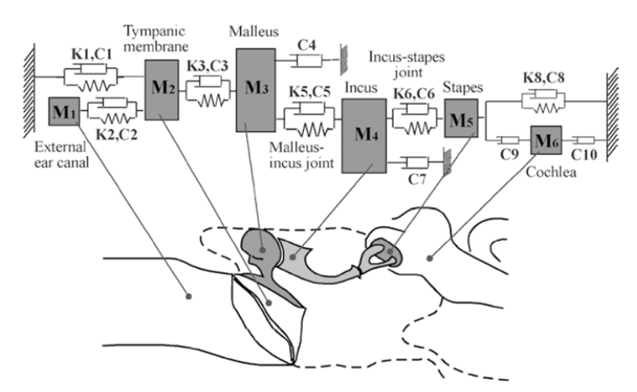


> Para caracterizar el modelo, los valores de las seis masas (M1 − M6) y los efectos viscosos del fluido coclear (C9 y C10)
 se obtienen de datos anatómicos del oído humano publicados previamente. Los demás valores se obtienen mediante un
 proceso de optimización. Los valores de los diferentes parámetros son:


 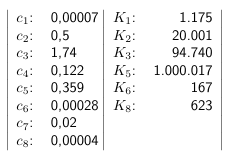

## 1. Construya un modelo numérico que sea capaz de predecir la posición de las diferentes masas, así como la velocidad de cada una de ellas en función del tiempo. Identifique claramente las ecuaciones constitutivas, variables y parámetros del modelo.

Para construir el modelo matematico se usara el principio de conservacion de momento, en este caso momento lineal, que se define matematicamente como:

∑F=0   entonces   dp/dt=0

Al ser un problema unidimensional solo se hablara de fuerza en una direccion. Primero y siguendo la ley de hooke, la fuerza ejercida por un resorte es F= K x y donde K es la constante de elasticidad de dicho resorte. Por otro lado, la fuerza que se ejerce debido a un amortiguador esta definida por F = C x dy/dt, donde C es el coeficiente de amortiguamiento. Por ultimo, las masas presentan una clara inercia que debe ser vencida y que se representa como M x dy^{2}/d^{2}t. Con esto claro podemos empezar a construir nuestras ecuaciones que modelan el sistema. Cabe aclarar que el numero de ecuaciones esta determinado por el numero de masas que hay.

Se realiza un diagrama de cuerpo libre para cada masa $M_i$, se relacionan las fuerzas con las que interactúa y se plantea la correspondiente ecuación matemática en términos de sus respectivos desplazamiento $y_i$ y velocidad $\dot{y_i}$.

## ecuacion 1:
$$M_{1}*dy^{2}/dt^{2}$$

$$M_1 \ddot{y_1}=F_1-c_2(\dot{y}_2-\dot{y}_1)-k_2(y_1-y_2)$$
Reordenando términos
$$M_1 \ddot{y_1}+c_2\dot{y}_1+(-c_2)\dot{y}_2+k_2y_1+(-k_2)y_2=F_1$$
Siguiendo el mismo proceso, se obtienen las ecuaciones para las masas restantes:

$$M_2 \ddot{y}_2+(-c_2)\dot{y}_1+(c_1+c_2+c_3)\dot{y}_2+(-c_3)\dot{y}_3+(-k_2)y_1+(k_1+k_2+k_3)y_2+(-k_3)y_3=F_2$$

$$M_3 \ddot{y}_3+(-c_3)\dot{y}_2+(c_3+c_4+c_5)\dot{y}_3+(-c_5)\dot{y}_4+(-k_3)y_2+(k_3+k_5)y_3+(-k_5)y_4=F_3$$

$$M_4 \ddot{y}_4+(-c_5)\dot{y}_3+(c_5+c_6+c_7)\dot{y}_4+(-c_6)\dot{y}_5+(-k_5)y_3+(k_5+k_6)y_4+(-k_6)y_5=F_4$$

$$M_5 \ddot{y}_5+(-c_6)\dot{y}_4+(c_6+c_8+c_9)\dot{y}_5+(-c_9)\dot{y}_6+(-k_6)y_4+(k_6+k_8)y_5=F_5$$

$$M_6 \ddot{y}_6+(-c_9)\dot{y}_5+(c_9+c_{10})\dot{y}_6=F_6$$

Ordenado de forma matricial se tiene:
$$[\textbf{M}] [\ddot{\textbf{y}}]+[\textbf{c}][\dot{\textbf{y}}]+[\textbf{k}][\textbf{y}]=[\textbf{F}]$$


\begin{bmatrix}
M_1 & 0 & 0 & 0 & 0 & 0\\
0 & M_2 & 0 & 0 & 0 & 0\\
0 & 0 & M_3 & 0 & 0 & 0\\
0 & 0 & 0 & M_4 & 0 & 0\\
0 & 0 & 0 & 0 & M_5 & 0\\
0 & 0 & 0 & 0 & 0 & M_6\\
\end{bmatrix}
\begin{bmatrix}
\ddot{y}_1\\
\ddot{y}_2\\
\ddot{y}_3\\
\ddot{y}_4\\
\ddot{y}_5\\
\ddot{y}_6\\
\end{bmatrix}
+
\begin{bmatrix}
c_2 & -c_2 & 0 & 0 & 0 & 0\\
-c_2 & c_1+c_2+c_3 & -c_3 & 0 & 0 & 0\\
0 & -c_3 & c_3+c_4+c_5 & -c_5 & 0 & 0\\
0 & 0 & -c_5 & c_5+c_6+c_7 & -c_6 & 0\\
0 & 0 & 0 & -c_6 & c_6+c_8+c_9 & -c_9\\
0 & 0 & 0 & 0 & -c_9 & c_9+c_{10}\\
\end{bmatrix}
\begin{bmatrix}
\dot{y}_1\\
\dot{y}_2\\
\dot{y}_3\\
\dot{y}_4\\
\dot{y}_5\\
\dot{y}_6\\
\end{bmatrix}
+
\begin{bmatrix}
k_2 & -k_2 & 0 & 0 & 0 & 0\\
-k_2 & k_1+k_2+k_3 & -k_3 & 0 & 0 & 0\\
0 & -k_3 & k_3+k_5 & -k_5 & 0 & 0\\
0 & 0 & -k_5 & k_5+k_6 & -k_6 & 0\\
0 & 0 & 0 & -k_6 & k_6+k_8 & 0\\
0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}

\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
y_6\\
\end{bmatrix}
=
\begin{bmatrix}
F_1\\
F_2\\
F_3\\
F_4\\
F_5\\
F_6\\
\end{bmatrix}



o

#Construya un modelo numérico que sea capaz de predecir la posición de las diferentes masas, así como la velocidad de cada una de ellas en función del tiempo. Identifique claramente las ecuaciones constitutivas, variables y parámetros del modelo.

## Solucion del sistema de ecuaciones diferenciales para F1 = 0.001N con el metodo numerico de Runge-Kutta pero con la libreria Scipy

(anotaciones)
si la fuerza es muy pequeña los resultados de desplazamientos se ven como ruido. iterar con 0.001 solo da bueno resultados en M1

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Valores de las constantes
M1, M2, M3, M4, M5, M6 = 1.55, 2.7, 4, 4, 1.78, 25.5
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = 0.00007, 0.5, 1.74, 0.122, 0.359, 0.00028, 0.02, 0.00004, 1, 1
k1, k2, k3, k5, k6, k8 = 1175, 20001, 94740, 1000017, 167, 623
F1, F2, F3, F4, F5, F6 = 0, 0.00005346, 0, 0, 0, 0

# Definir la función del sistema de ecuaciones diferenciales
def system(t, y):
    y1, y2, y3, y4, y5, y6, dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt = y
    dy1_dt2 = (F1 - c2 * dy1_dt + c2 * dy2_dt - k2 * y1 + k2 * y2) / M1
    dy2_dt2 = (F2 + c2 * dy1_dt - (c1 + c2 + c3) * dy2_dt + c3 * dy3_dt + k2 * y1 - (k1 + k2 + k3) * y2 + k3 * y3) / M2
    dy3_dt2 = (F3 + c3 * dy2_dt - (c3 + c4 + c5) * dy3_dt + c5 * dy4_dt + k3 * y2 - (k3 + k5) * y3 + k5 * y4) / M3
    dy4_dt2 = (F4 + c5 * dy3_dt - (c5 + c6 + c7) * dy4_dt + c6 * dy5_dt + k5 * y3 - (k5 + k6) * y4 + k6 * y5) / M4
    dy5_dt2 = (F5 + c6 * dy4_dt - (c6 + c8 + c9) * dy5_dt + c9 * dy6_dt + k6 * y4 - (k6 + k8) * y5) / M5
    dy6_dt2 = (F6 + c9 * dy5_dt - (c9 + c10) * dy6_dt) / M6

    return [dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt, dy1_dt2, dy2_dt2, dy3_dt2, dy4_dt2, dy5_dt2, dy6_dt2]

# Condiciones iniciales: [x1, v1, x2, v2, x3, v3, x4, v4, x5, v5, x6, v6]
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Resolver el sistema de ecuaciones diferenciales
t_span = [0, 1000]
t_eval = np.linspace(0, 1000, 1000)
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45')

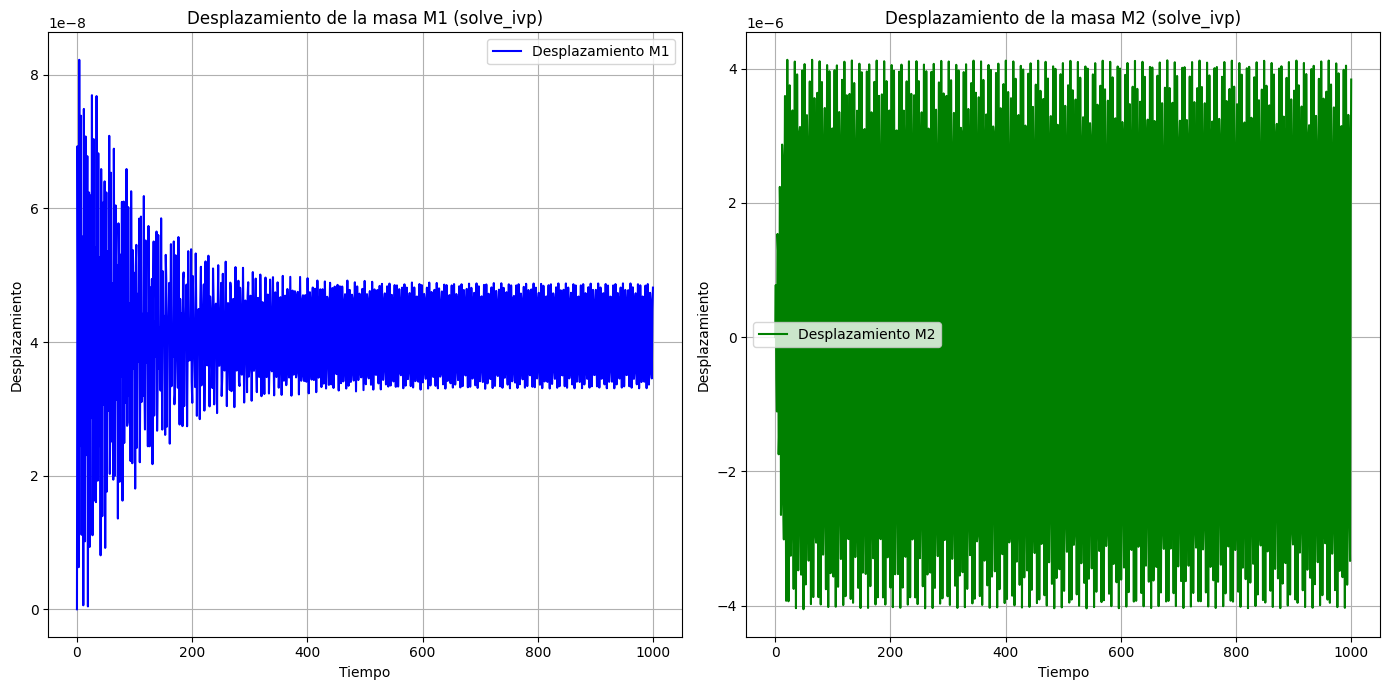

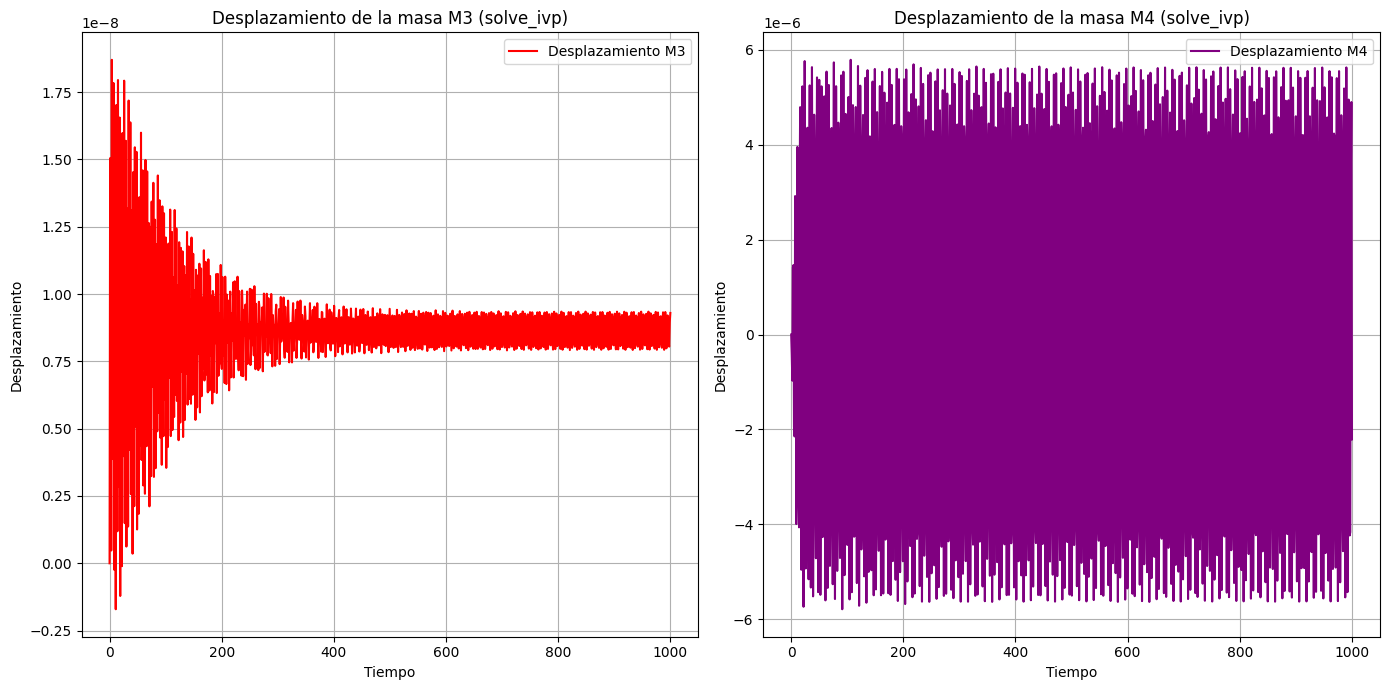

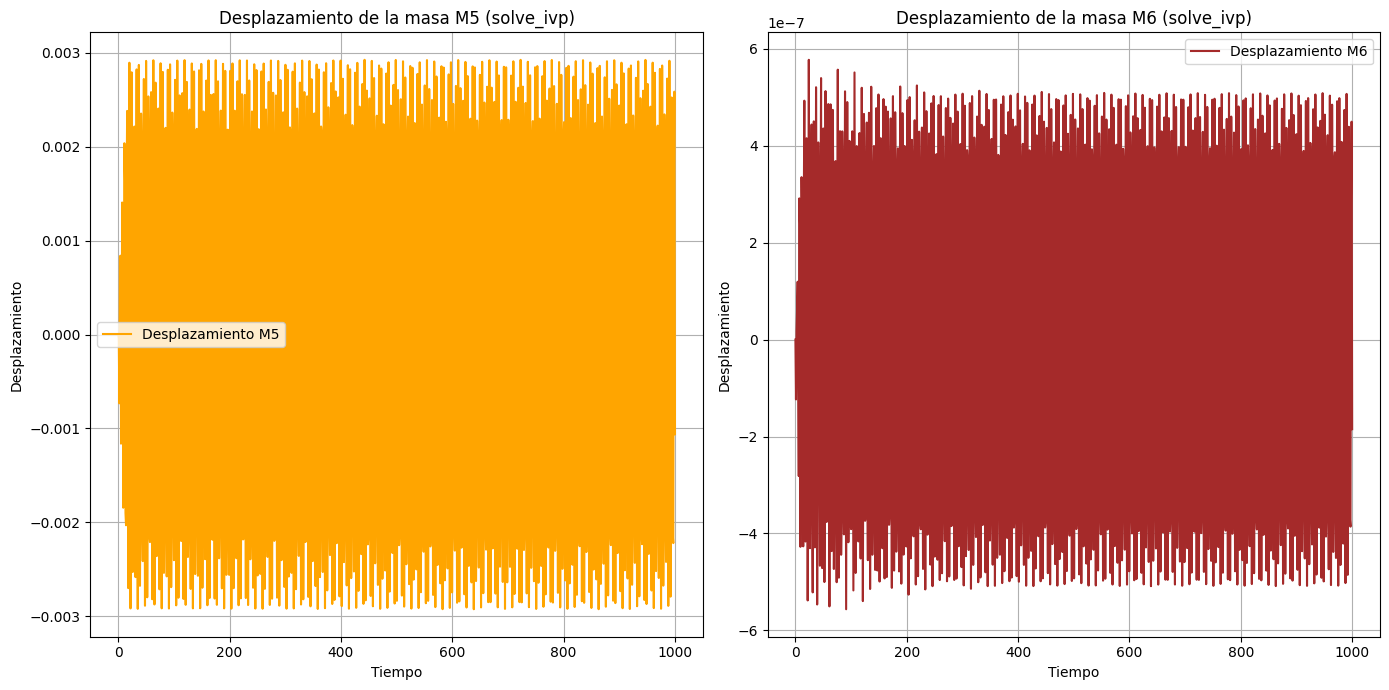

In [37]:
import matplotlib.pyplot as plt

# Figura para M1 y M2
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Desplazamiento M1', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Desplazamiento de la masa M1 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[2], label='Desplazamiento M2', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Desplazamiento de la masa M2 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Figura para M3 y M4
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[4], label='Desplazamiento M3', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Desplazamiento de la masa M3 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[6], label='Desplazamiento M4', color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Desplazamiento de la masa M4 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Figura para M5 y M6
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[8], label='Desplazamiento M5', color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Desplazamiento de la masa M5 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[10], label='Desplazamiento M6', color='brown')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Desplazamiento de la masa M6 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


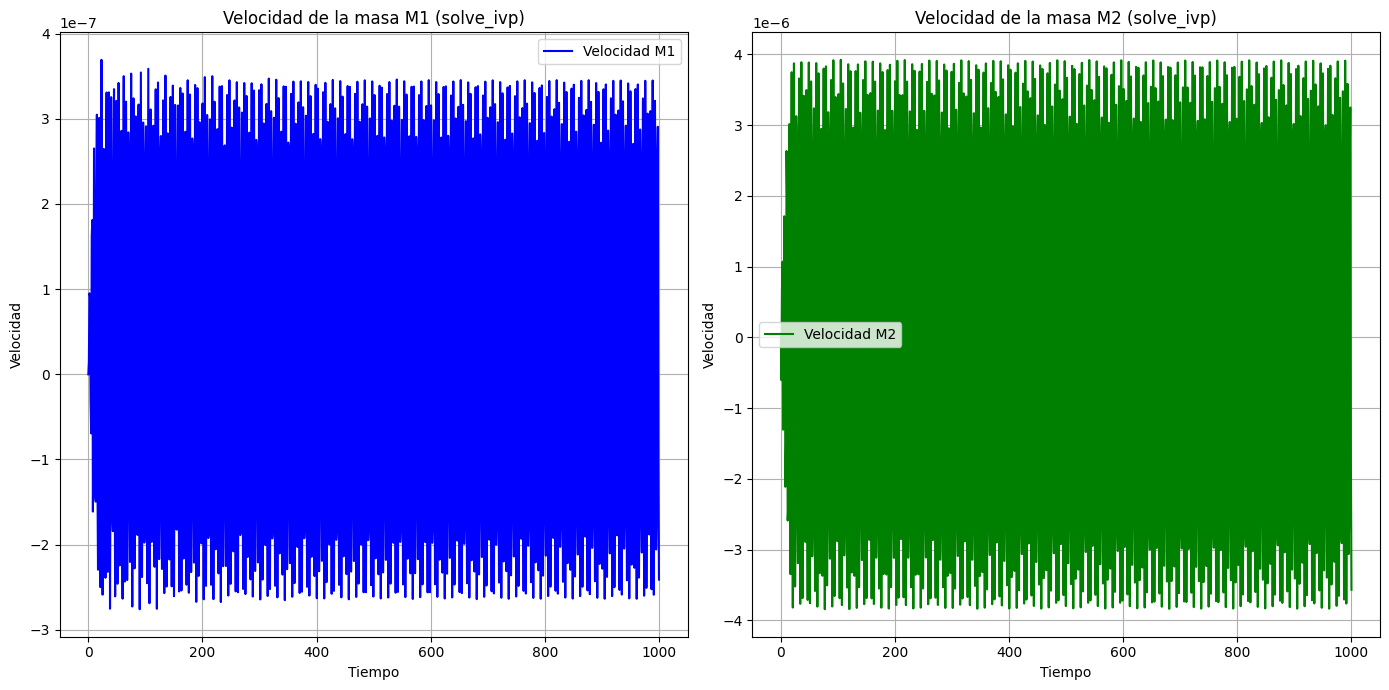

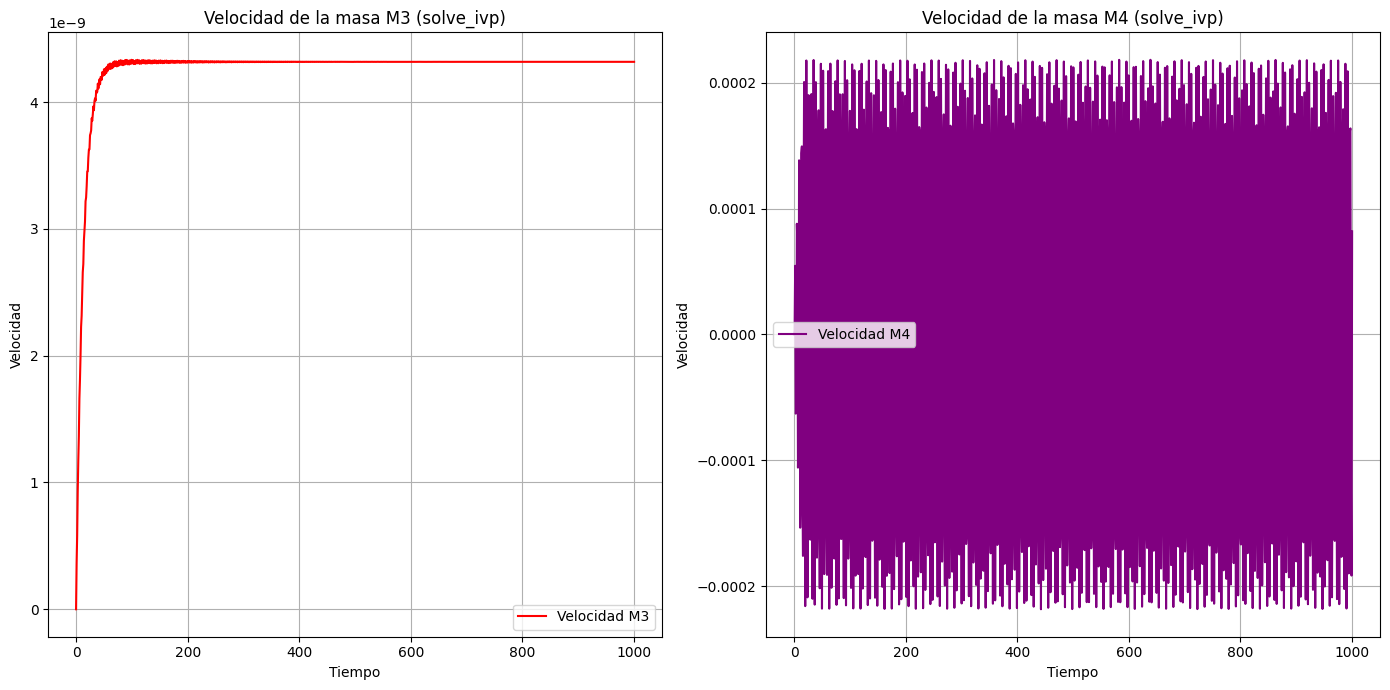

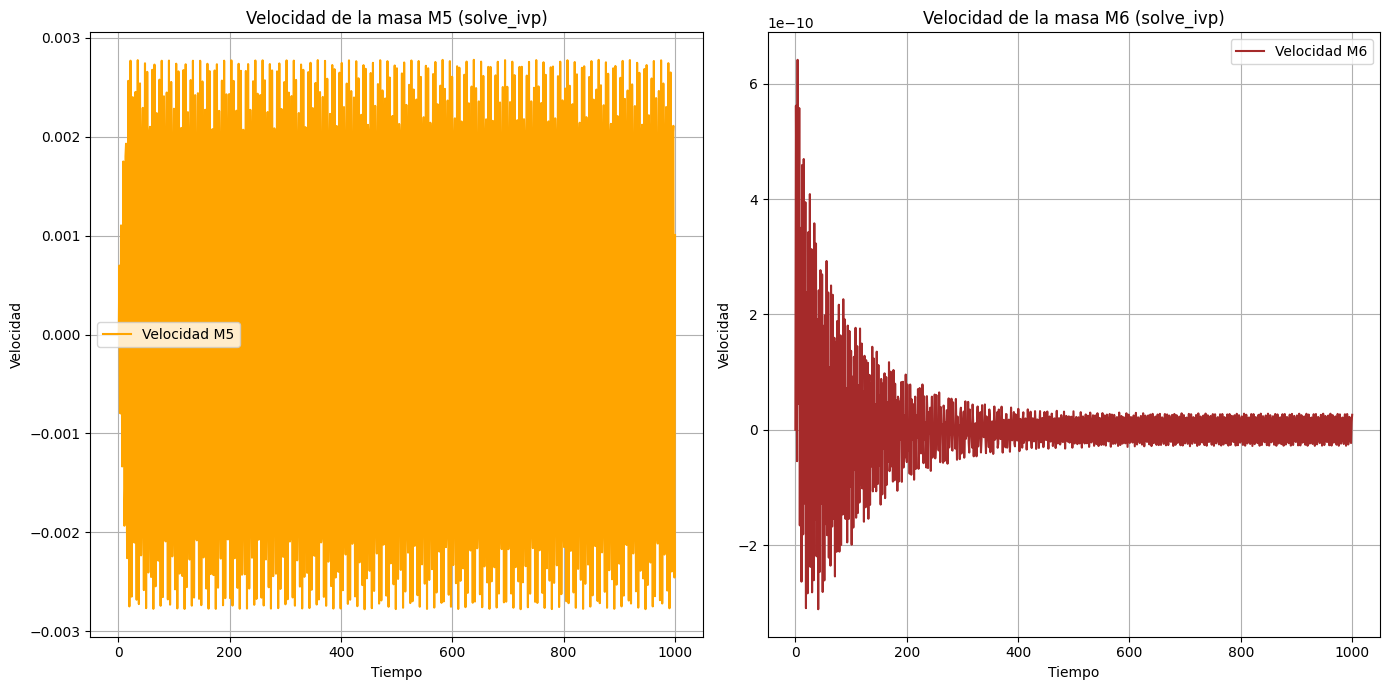

In [38]:
# Figura para M1 y M2
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[1], label='Velocidad M1', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad de la masa M1 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[3], label='Velocidad M2', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad de la masa M2 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Figura para M3 y M4
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[5], label='Velocidad M3', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad de la masa M3 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[7], label='Velocidad M4', color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad de la masa M4 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Figura para M5 y M6
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[9], label='Velocidad M5', color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad de la masa M5 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[11], label='Velocidad M6', color='brown')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad de la masa M6 (solve_ivp)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


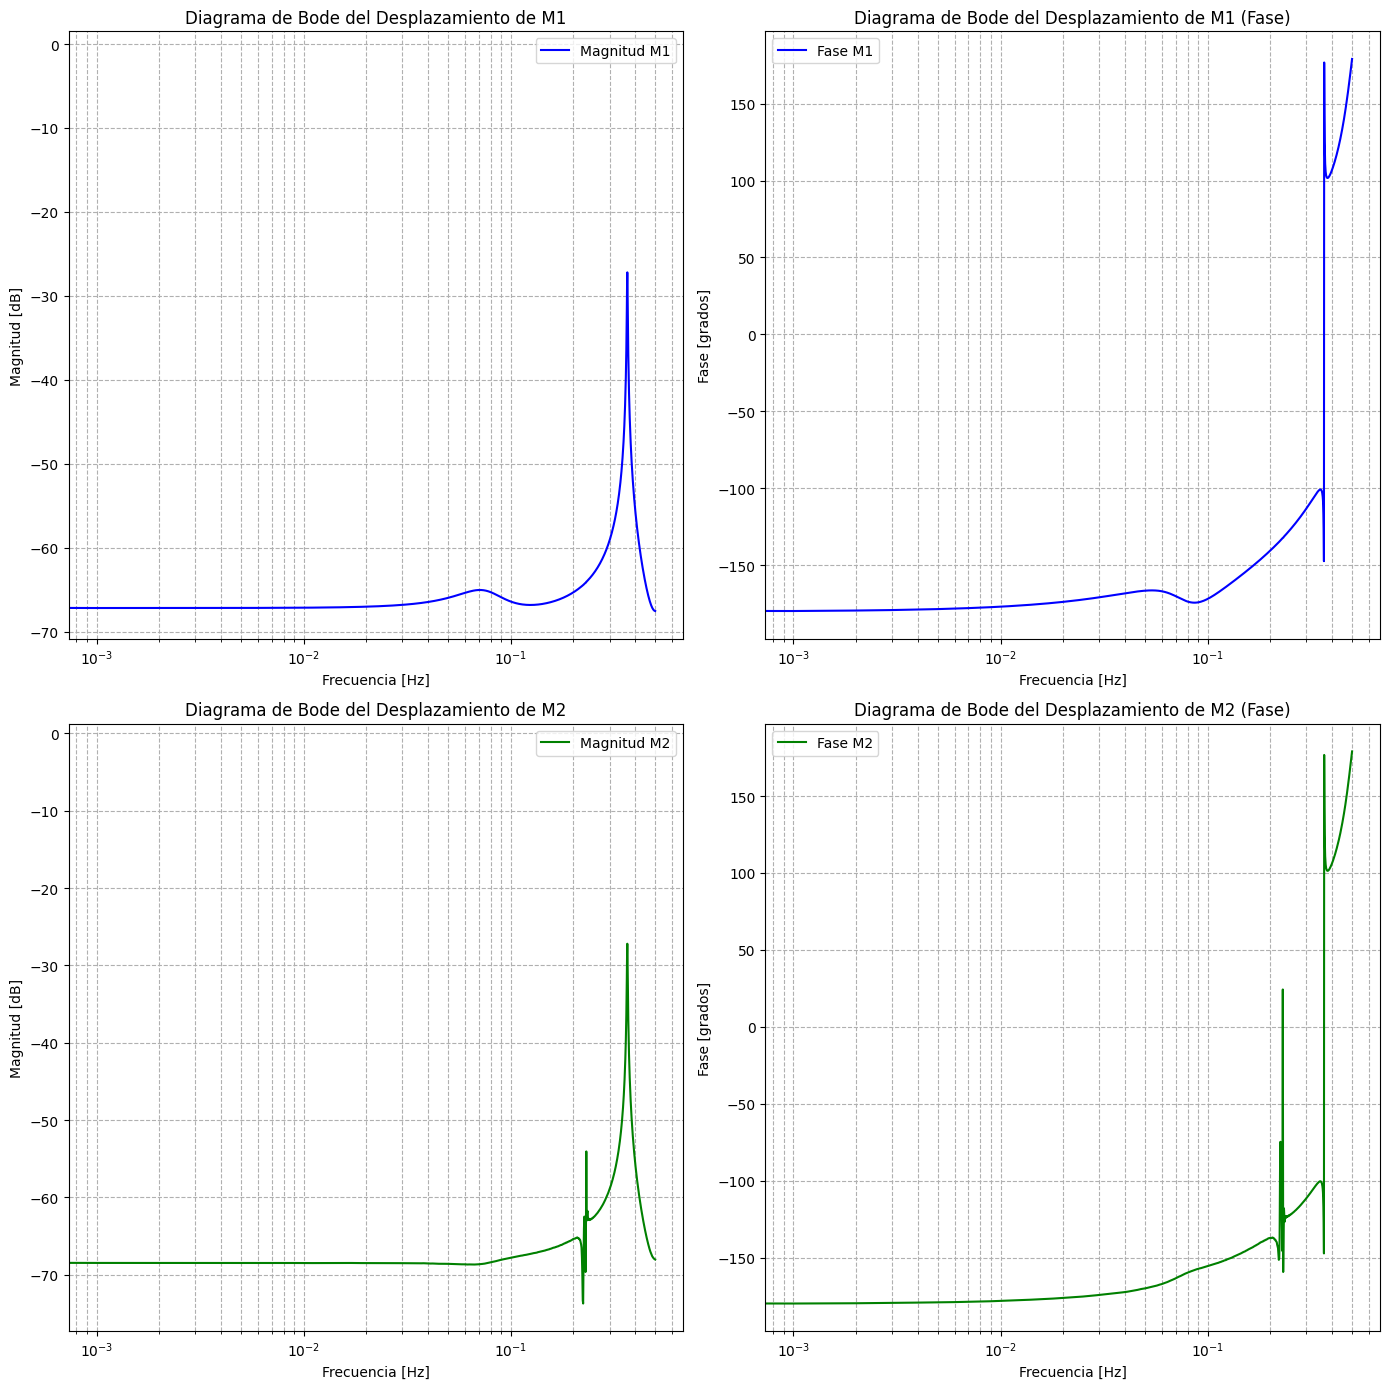

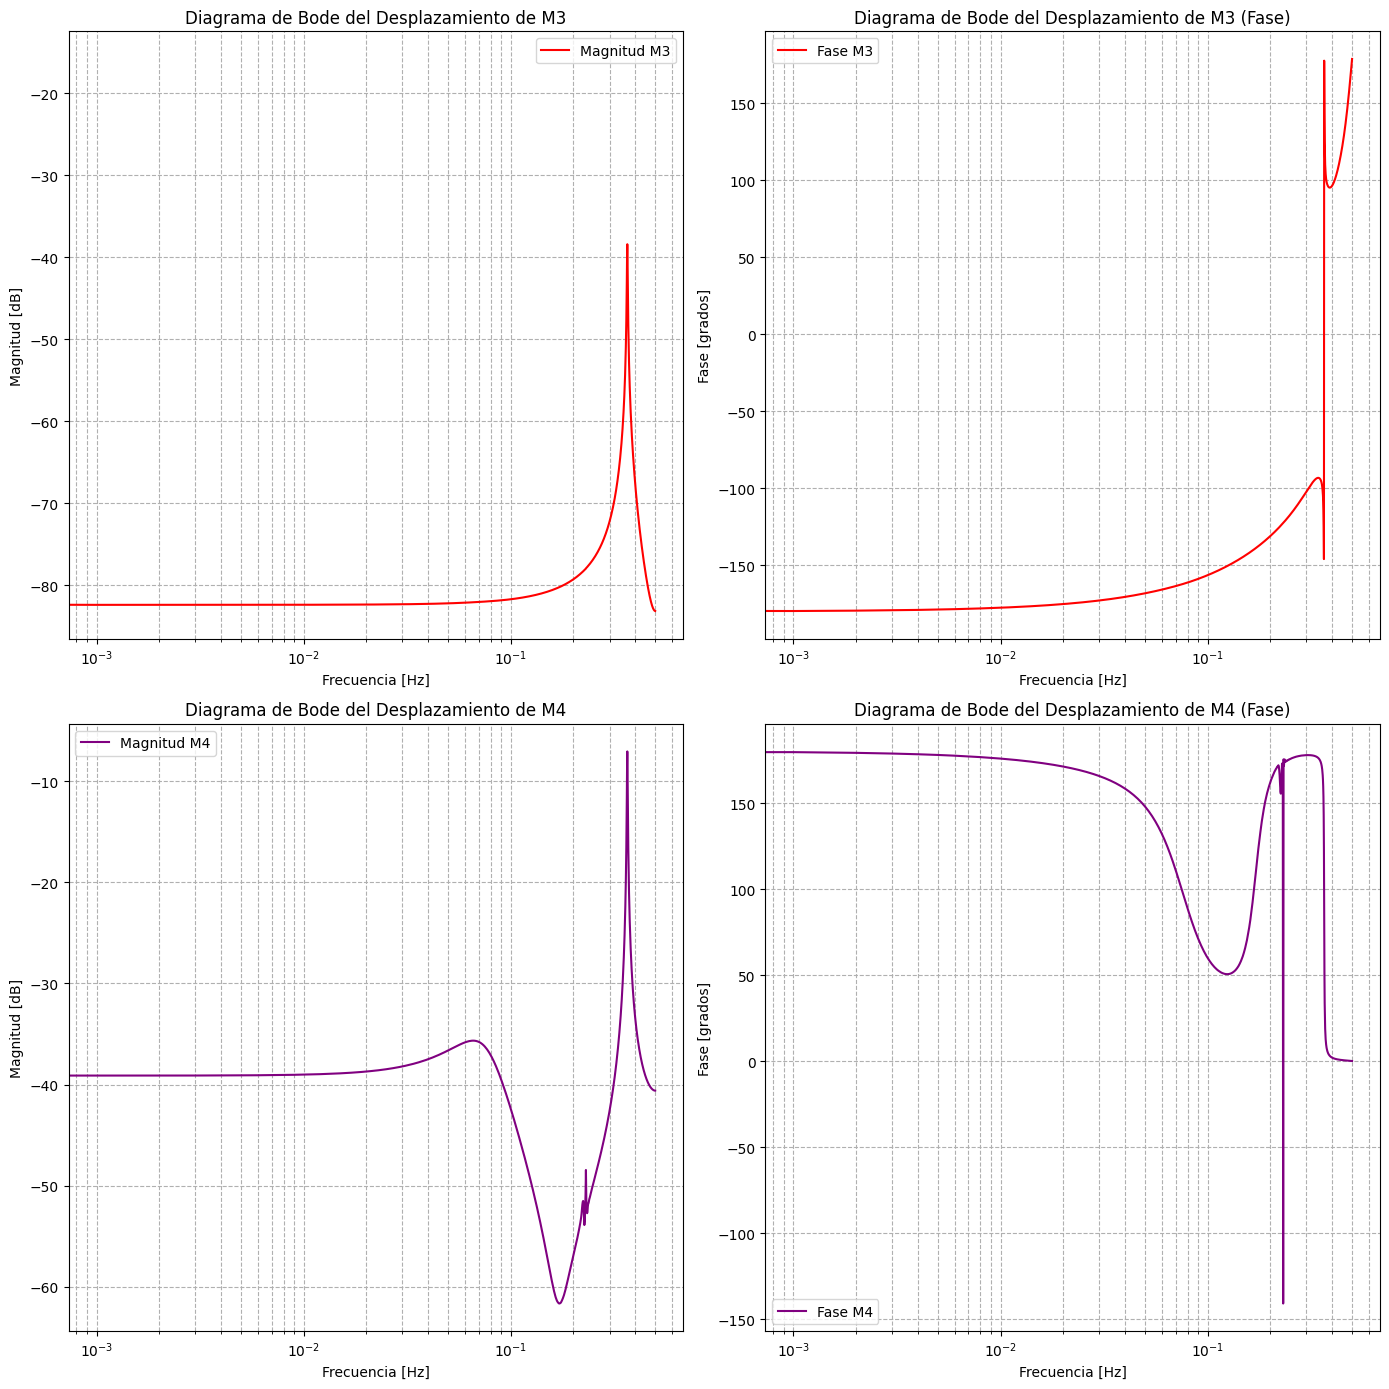

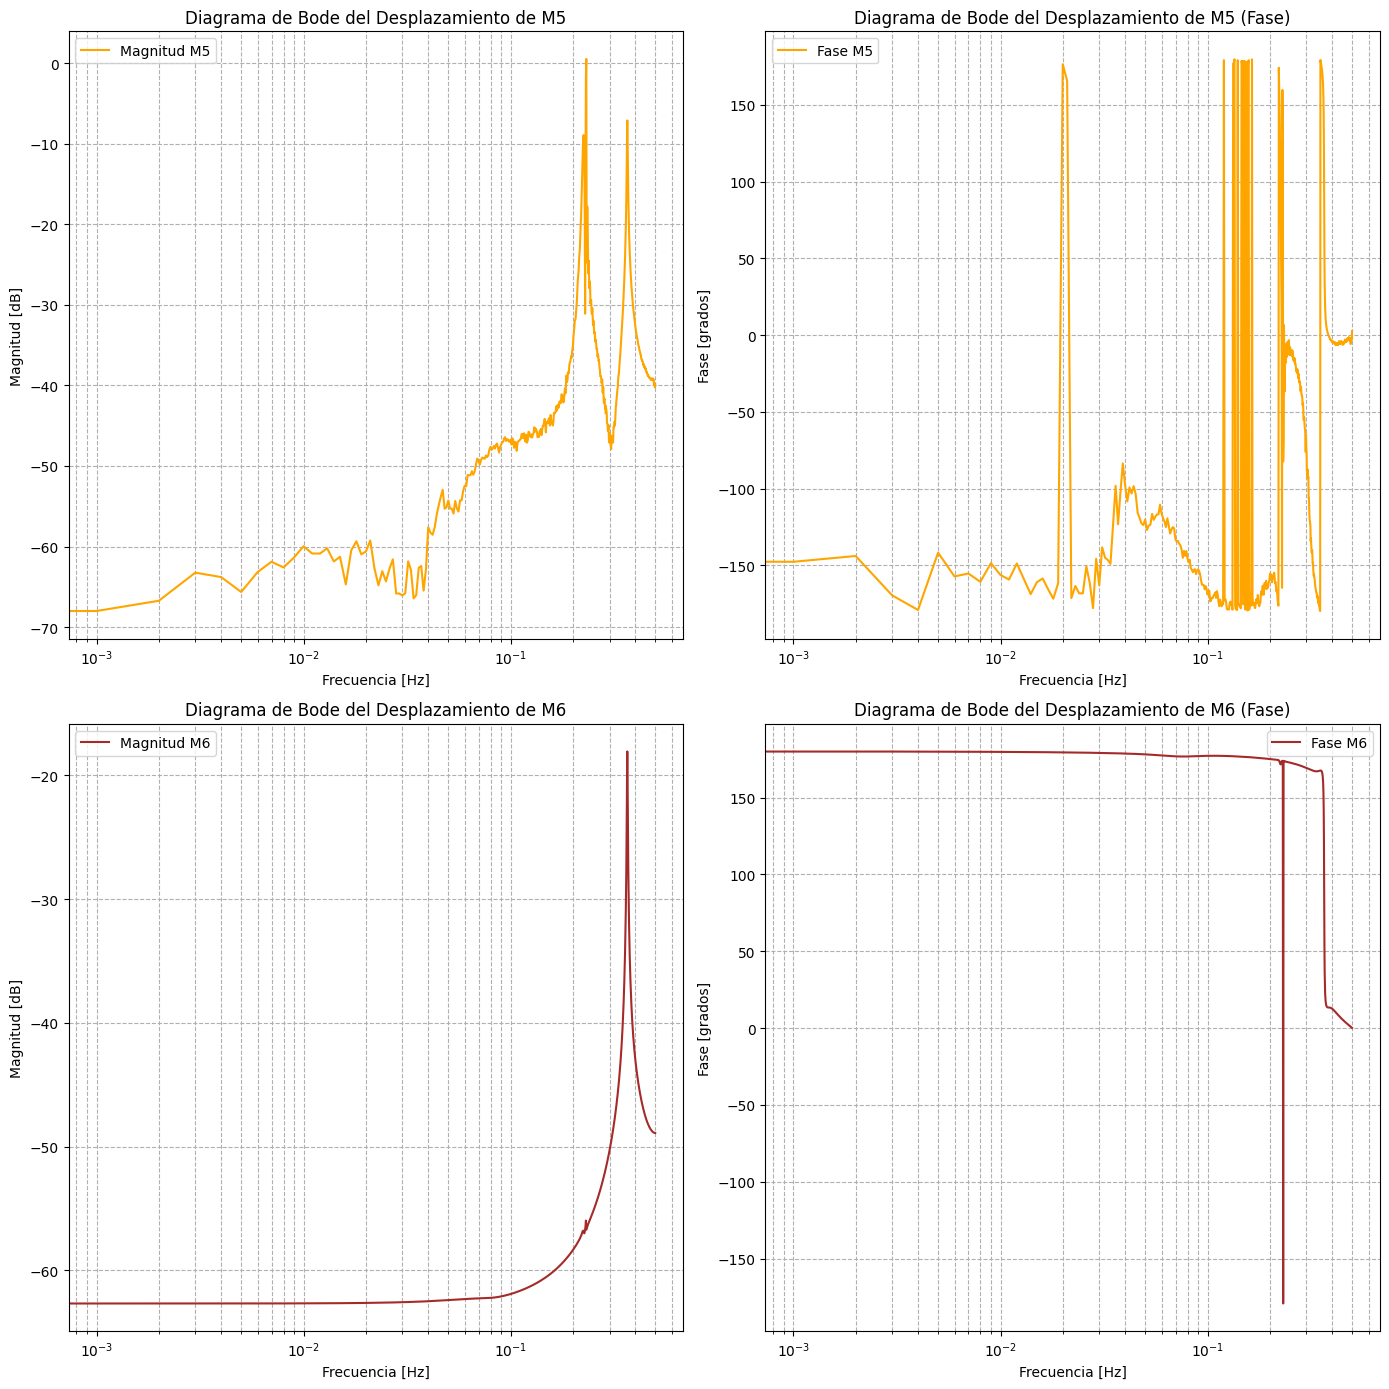

In [39]:
# Crear el vector de frecuencias
n = len(sol.t)
freq = np.fft.fftfreq(n, t_eval[1] - t_eval[0])

# Función para convertir a dB
def to_dB(value):
    return 20 * np.log10(np.abs(value))

# Graficar el diagrama de Bode para cada desplazamiento

# Figura para Bode de M1 y M2
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.semilogx(freq[:n//2], to_dB(fft_y1[:n//2]), label='Magnitud M1', color='blue')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M1')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 2)
plt.semilogx(freq[:n//2], np.angle(fft_y1[:n//2], deg=True), label='Fase M1', color='blue')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M1 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 3)
plt.semilogx(freq[:n//2], to_dB(fft_y2[:n//2]), label='Magnitud M2', color='green')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M2')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 4)
plt.semilogx(freq[:n//2], np.angle(fft_y2[:n//2], deg=True), label='Fase M2', color='green')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M2 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

# Figura para Bode de M3 y M4
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.semilogx(freq[:n//2], to_dB(fft_y3[:n//2]), label='Magnitud M3', color='red')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M3')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 2)
plt.semilogx(freq[:n//2], np.angle(fft_y3[:n//2], deg=True), label='Fase M3', color='red')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M3 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 3)
plt.semilogx(freq[:n//2], to_dB(fft_y4[:n//2]), label='Magnitud M4', color='purple')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M4')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 4)
plt.semilogx(freq[:n//2], np.angle(fft_y4[:n//2], deg=True), label='Fase M4', color='purple')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M4 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

# Figura para Bode de M5 y M6
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.semilogx(freq[:n//2], to_dB(fft_y5[:n//2]), label='Magnitud M5', color='orange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M5')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 2)
plt.semilogx(freq[:n//2], np.angle(fft_y5[:n//2], deg=True), label='Fase M5', color='orange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M5 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 3)
plt.semilogx(freq[:n//2], to_dB(fft_y6[:n//2]), label='Magnitud M6', color='brown')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M6')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 4)
plt.semilogx(freq[:n//2], np.angle(fft_y6[:n//2], deg=True), label='Fase M6', color='brown')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M6 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


# Solucion del sistema de ecuaciones diferenciales para F1 = 0.001N con el metodo numerico de Runge-Kutta
(obeservaciones)
Para este metodo si se pueden usar fuerzas muy pequeñas sin afectaciones en la solucion

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de las constantes
M1, M2, M3, M4, M5, M6 = 1.55, 2.7, 4, 4, 1.78, 25.5
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = 0.00007, 0.5, 1.74, 0.122, 0.359, 0.00028, 0.02, 0.00004, 1, 1
k1, k2, k3, k5, k6, k8 = 1175, 20001, 94740, 1000017, 167, 623
F1 = 0
F2, F3, F4, F5, F6 = 0.00005346, 0, 0, 0, 0

# Problema 1: Crear un vector de tiempo
t0 = 0
tf = 500
deltaT = 0.001  # Disminuimos deltaT para mayor precisión(si no se usa 0.001 o menos no funciona)
t = np.arange(t0, tf, deltaT)

# Problema 2: Crear un vector para almacenar los valores de Y
y = np.zeros((12, len(t)))  # 12 variables en total (y1, y2, ..., y6 y sus derivadas)

# Problema 3: Asignar las condiciones iniciales
y[:, 0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Problema 4: Crear una función para evaluar las derivadas
def derivadas(y, t):
    y1, y2, y3, y4, y5, y6, dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt = y
    dy1_dt2 = (F1 - c2 * dy1_dt + c2 * dy2_dt - k2 * y1 + k2 * y2) / M1
    dy2_dt2 = (F2 + c2 * dy1_dt - (c1 + c2 + c3) * dy2_dt + c3 * dy3_dt + k2 * y1 - (k1 + k2 + k3) * y2 + k3 * y3) / M2
    dy3_dt2 = (F3 + c3 * dy2_dt - (c3 + c4 + c5) * dy3_dt + c5 * dy4_dt + k3 * y2 - (k3 + k5) * y3 + k5 * y4) / M3
    dy4_dt2 = (F4 + c5 * dy3_dt - (c5 + c6 + c7) * dy4_dt + c6 * dy5_dt + k5 * y3 - (k5 + k6) * y4 + k6 * y5) / M4
    dy5_dt2 = (F5 + c6 * dy4_dt - (c6 + c8 + c9) * dy5_dt + c9 * dy6_dt + k6 * y4 - (k6 + k8) * y5) / M5
    dy6_dt2 = (F6 + c9 * dy5_dt - (c9 + c10) * dy6_dt) / M6

    return np.array([dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt, dy1_dt2, dy2_dt2, dy3_dt2, dy4_dt2, dy5_dt2, dy6_dt2])

# Problema 5: Método iterativo usando el método de Runge-Kutta de cuarto orden
def runge_kutta_4(y, t, deltaT):
    k1 = derivadas(y, t)
    k2 = derivadas(y + 0.5 * k1 * deltaT, t + 0.5 * deltaT)
    k3 = derivadas(y + 0.5 * k2 * deltaT, t + 0.5 * deltaT)
    k4 = derivadas(y + k3 * deltaT, t + deltaT)
    return y + (deltaT / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

for i in range(len(t) - 1):
    y[:, i + 1] = runge_kutta_4(y[:, i], t[i], deltaT)

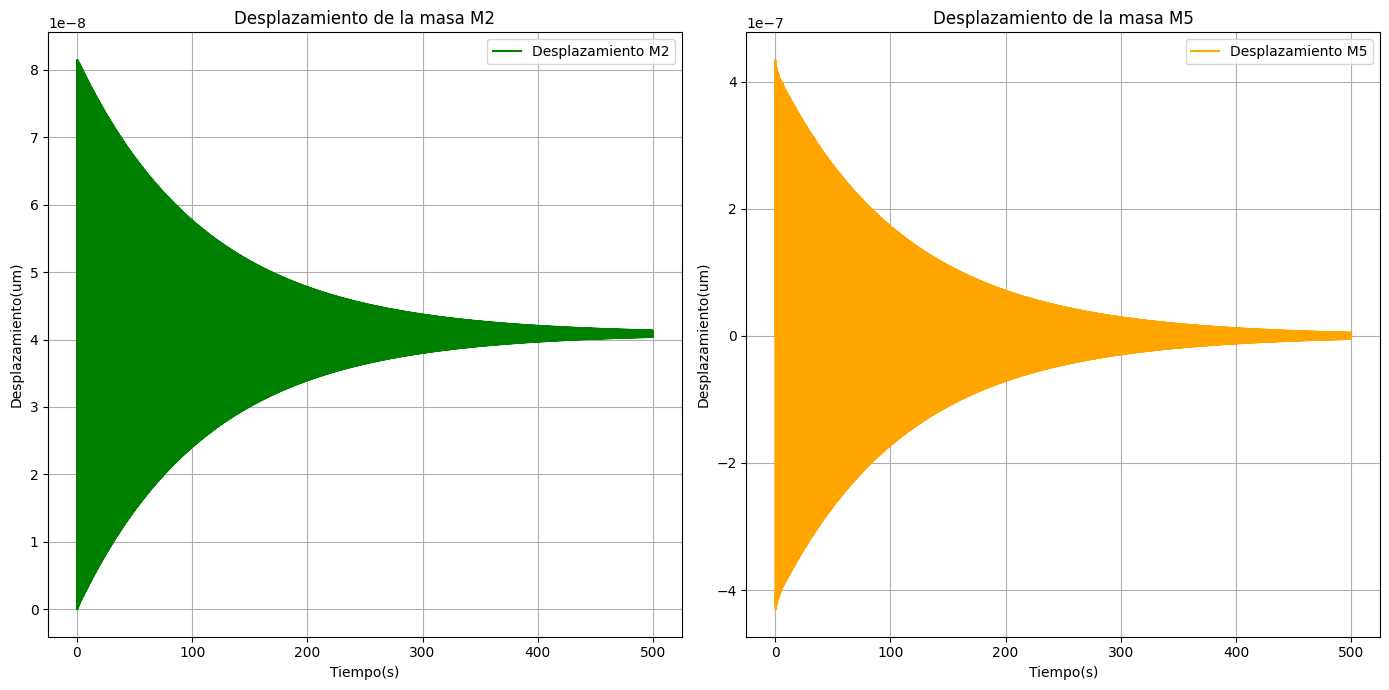

In [98]:
import matplotlib.pyplot as plt

# Figura para M2 y M5
plt.figure(figsize=(14, 7))

# Gráfica para M2
plt.subplot(1, 2, 1)
plt.plot(t, y[2, :], label='Desplazamiento M2', color='green')
plt.xlabel('Tiempo(s)')
plt.ylabel('Desplazamiento(um)')
plt.title('Desplazamiento de la masa M2')
plt.legend()
plt.grid(True)

# Gráfica para M5
plt.subplot(1, 2, 2)
plt.plot(t, y[8, :], label='Desplazamiento M5', color='orange')
plt.xlabel('Tiempo(s)')
plt.ylabel('Desplazamiento(um)')
plt.title('Desplazamiento de la masa M5')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



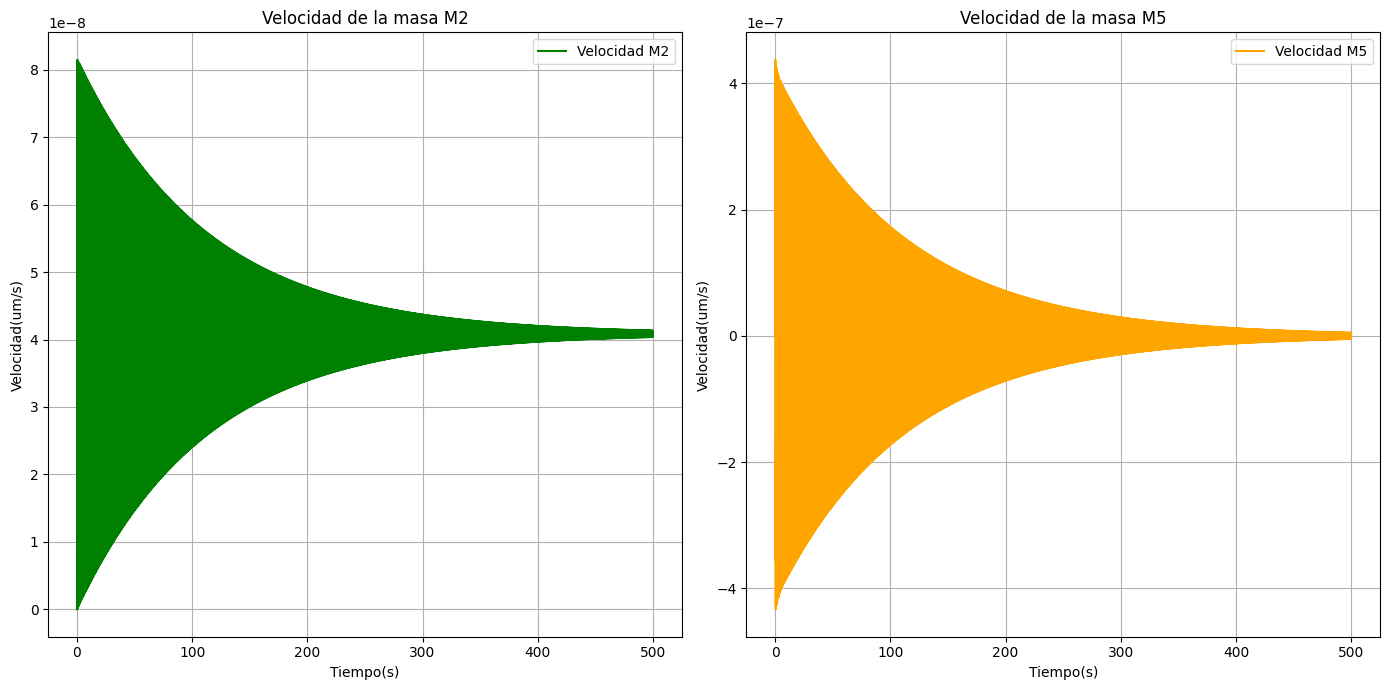

In [97]:
import matplotlib.pyplot as plt

# Extraer las velocidades de cada masa de la matriz y
v1 = y[1, :]
v2 = y[3, :]
v3 = y[5, :]
v4 = y[7, :]
v5 = y[9, :]
v6 = y[11, :]

# Figura para M2 y M5
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t, v2, label='Velocidad M2', color='green')
plt.xlabel('Tiempo(s)')
plt.ylabel('Velocidad(um/s)')
plt.title('Velocidad de la masa M2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, v5, label='Velocidad M5', color='orange')
plt.xlabel('Tiempo(s)')
plt.ylabel('Velocidad(um/s)')
plt.title('Velocidad de la masa M5')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




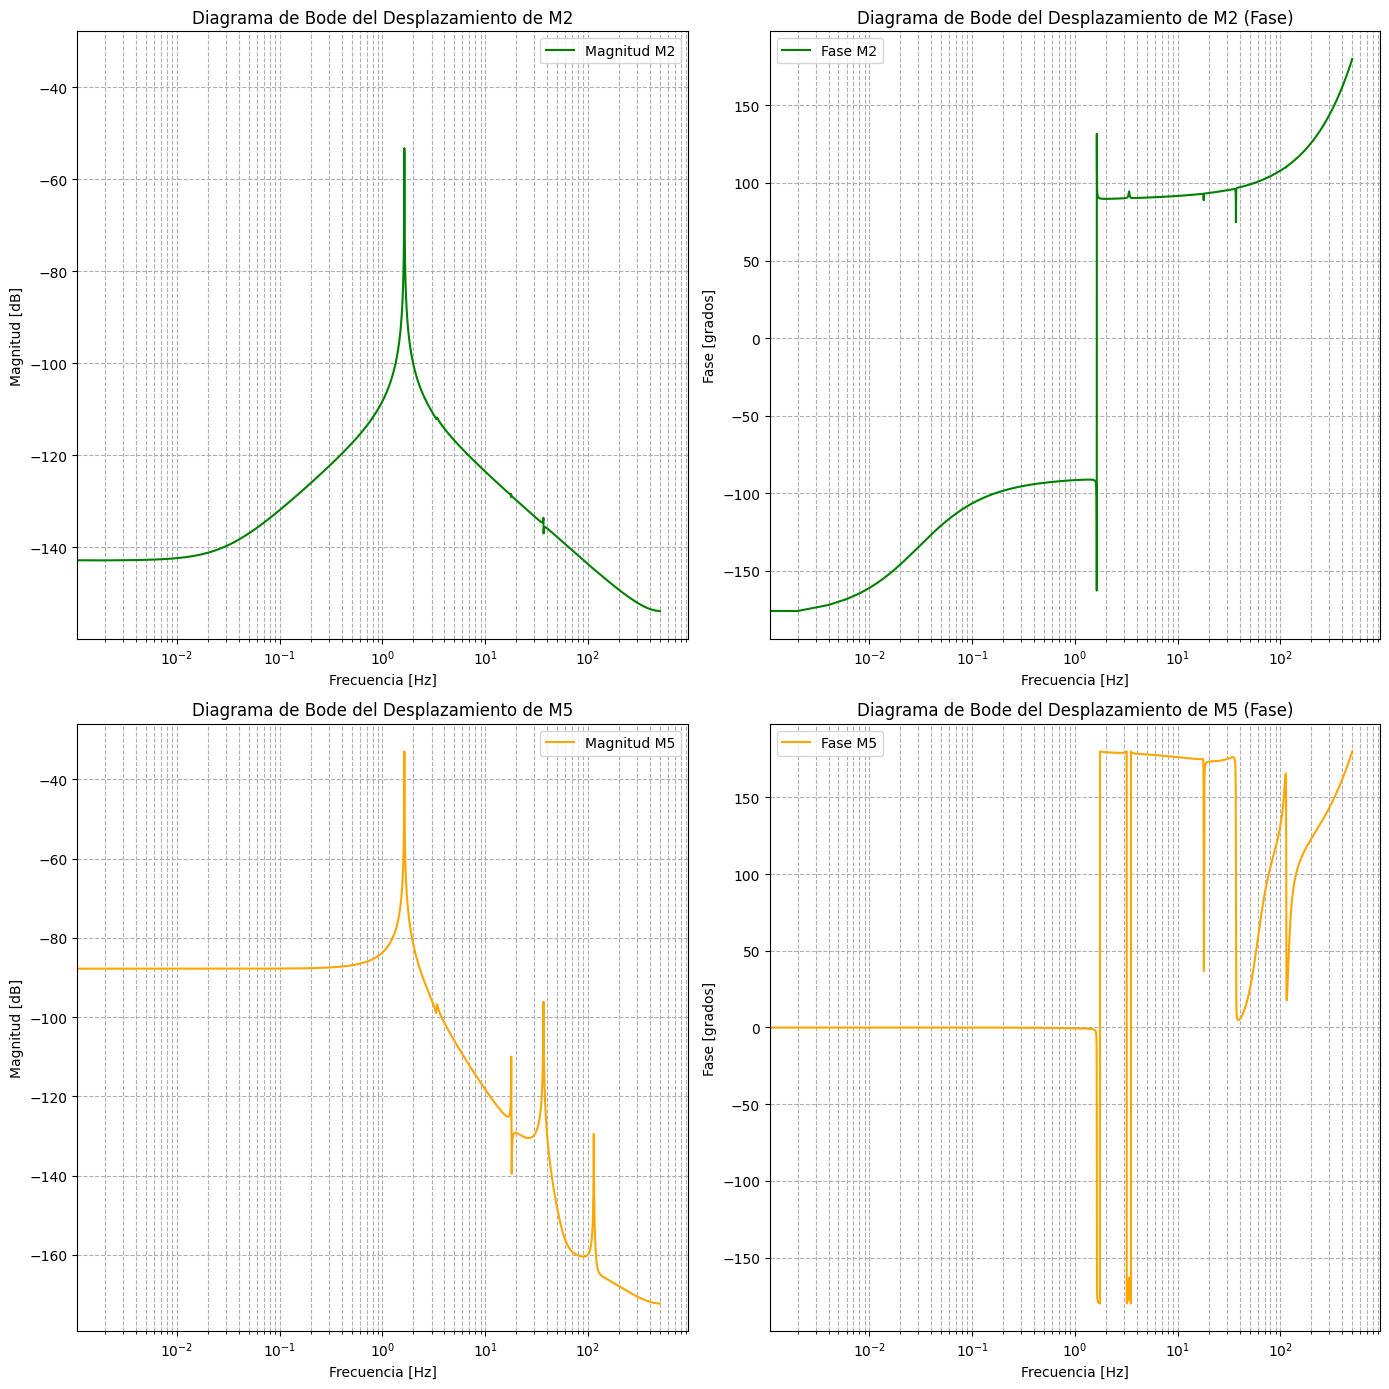

In [95]:
# Función para convertir a dB
def to_dB(value):
    return 20 * np.log10(np.abs(value))

# Graficar el diagrama de Bode para cada desplazamiento

# Figura para Bode de M1 y M2
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.semilogx(freq[:n//2], to_dB(fft_y2[:n//2]), label='Magnitud M2', color='green')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M2')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 2)
plt.semilogx(freq[:n//2], np.angle(fft_y2[:n//2], deg=True), label='Fase M2', color='green')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M2 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 3)
plt.semilogx(freq[:n//2], to_dB(fft_y5[:n//2]), label='Magnitud M5', color='orange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Diagrama de Bode del Desplazamiento de M5')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 4)
plt.semilogx(freq[:n//2], np.angle(fft_y5[:n//2], deg=True), label='Fase M5', color='orange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M5 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")


plt.tight_layout()
plt.show()



#Solucion mediante Transformada de Laplace

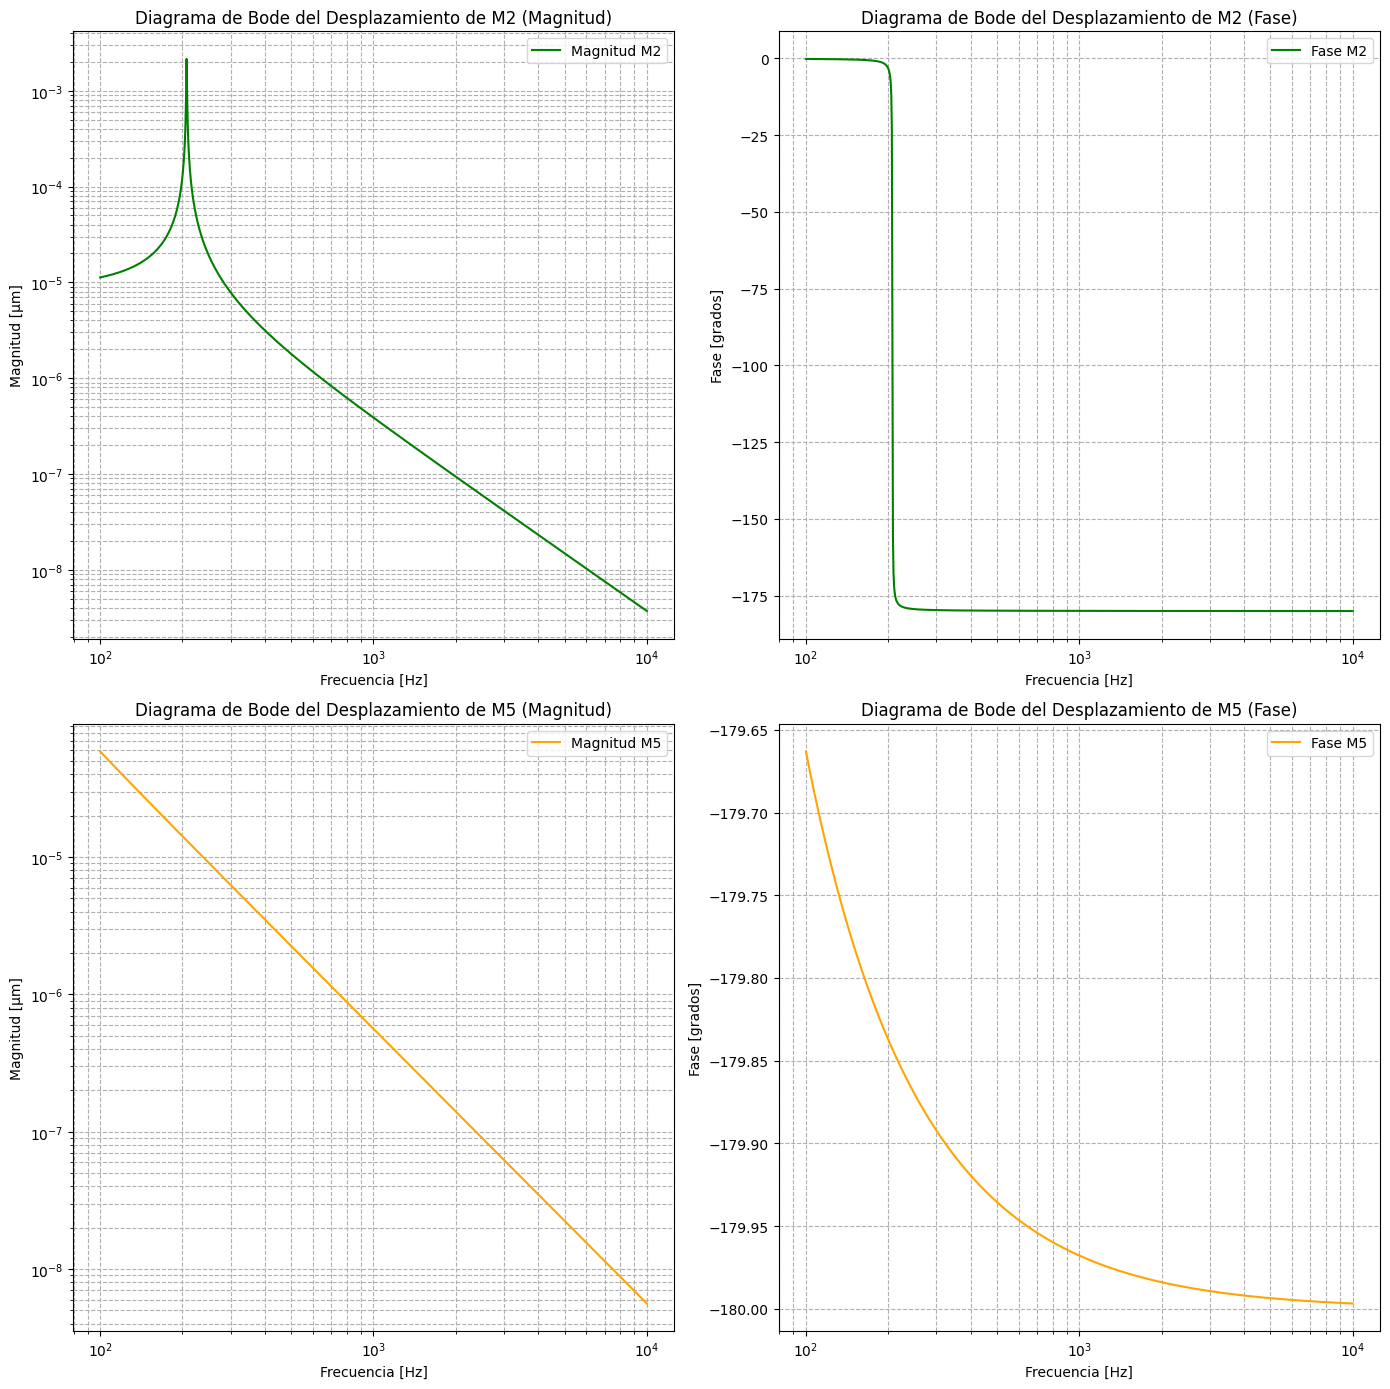

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import bode, lti

# Definir las constantes
M1, M2, M3, M4, M5, M6 = 1.55, 2.7, 4, 4, 1.78, 25.5
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = 0.00007, 0.5, 1.74, 0.122, 0.359, 0.00028, 0.02, 0.00004, 1, 1
k1, k2, k3, k5, k6, k8 = 1175, 20001, 94740, 1000017, 167, 623
F1, F2, F3, F4, F5, F6 = 0, 0.00005346, 0, 0, 0, 0

# Definir las ecuaciones diferenciales
def system(y, t):
    y1, y2, y3, y4, y5, y6, dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt = y
    dy1_dt2 = (F1 - c2 * dy1_dt + c2 * dy2_dt - k2 * y1 + k2 * y2) / M1
    dy2_dt2 = (F2 + c2 * dy1_dt - (c1 + c2 + c3) * dy2_dt + c3 * dy3_dt + k2 * y1 - (k1 + k2 + k3) * y2 + k3 * y3) / M2
    dy3_dt2 = (F3 + c3 * dy2_dt - (c3 + c4 + c5) * dy3_dt + c5 * dy4_dt + k3 * y2 - (k3 + k5) * y3 + k5 * y4) / M3
    dy4_dt2 = (F4 + c5 * dy3_dt - (c5 + c6 + c7) * dy4_dt + c6 * dy5_dt + k5 * y3 - (k5 + k6) * y4 + k6 * y5) / M4
    dy5_dt2 = (F5 + c6 * dy4_dt - (c6 + c8 + c9) * dy5_dt + c9 * dy6_dt + k6 * y4 - (k6 + k8) * y5) / M5
    dy6_dt2 = (F6 + c9 * dy5_dt - (c9 + c10) * dy6_dt) / M6

    return [dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt, dy1_dt2, dy2_dt2, dy3_dt2, dy4_dt2, dy5_dt2, dy6_dt2]

# Funciones de transferencia (simplificadas para este ejemplo)
num2 = [1]
den2 = [M2, (c1+c2+c3), (k1+k2+k3)]
system2 = lti(num2, den2)

num5 = [1]
den5 = [M5, (c6+c8+c9), (k6+k8)]
system5 = lti(num5, den5)

# Rango de frecuencias
w = np.logspace(2, 4, 1000)  # Rango de frecuencias de 300 Hz a 5000 Hz

# Calcular las respuestas en frecuencia
w, mag2, phase2 = bode(system2, w=w)
w, mag5, phase5 = bode(system5, w=w)

# Convertir magnitud de dB a micrómetros
mag2 = 10**(mag2 / 20)  # Convertir de dB a factor lineal
mag5 = 10**(mag5 / 20)  # Convertir de dB a factor lineal

# Graficar el diagrama de Bode
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.loglog(w, mag2, label='Magnitud M2', color='green')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [μm]')
plt.title('Diagrama de Bode del Desplazamiento de M2 (Magnitud)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 2)
plt.semilogx(w, phase2, label='Fase M2', color='green')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M2 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 3)
plt.loglog(w, mag5, label='Magnitud M5', color='orange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [μm]')
plt.title('Diagrama de Bode del Desplazamiento de M5 (Magnitud)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(2, 2, 4)
plt.semilogx(w, phase5, label='Fase M5', color='orange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.title('Diagrama de Bode del Desplazamiento de M5 (Fase)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


podemos ver primeramente como la solucion usando la funcion solve.ivp da resultado erraticos para cargas tan pequeñas, por eso fue mas adecuado implementar la solucion usando Runge-Kutta. Tambien podemos ver como la grafica log-log (usando FFT, transformada rapida de fourier) de la M2 y M5 tienen picos que no corresponden a la grafica y que sus diagramas de fase son erraticos, por el contrario, se implemento una solucion usando la transformada de Laplace en donde se ven curvas limpias y sin errores pero donde tambien podemos ver como se asemejan bastante a las graficas que se obtuvieron anteriormente.

#Evalue la influencia que tienen los parámetros k1, k6, k8, c4 y c7 en la respuesta de las masas M2 y M5. Para este punto realice cambios de 0,1 a 10 veces el valor mostrado en la Tabla 1. Es recomendable construir gráficos de desplazamiento en función de la frecuencia de entrada al sistema.

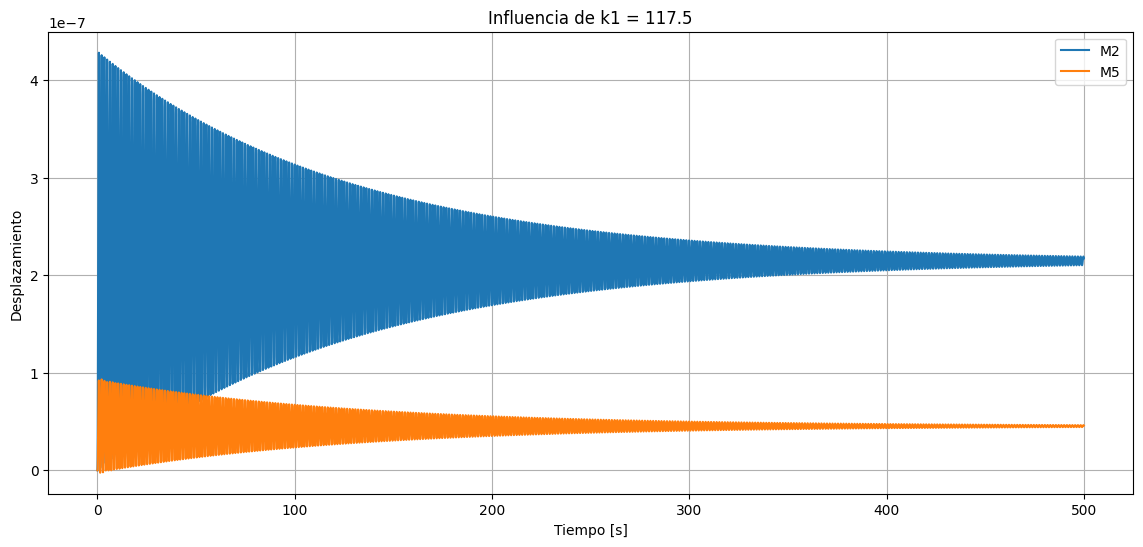

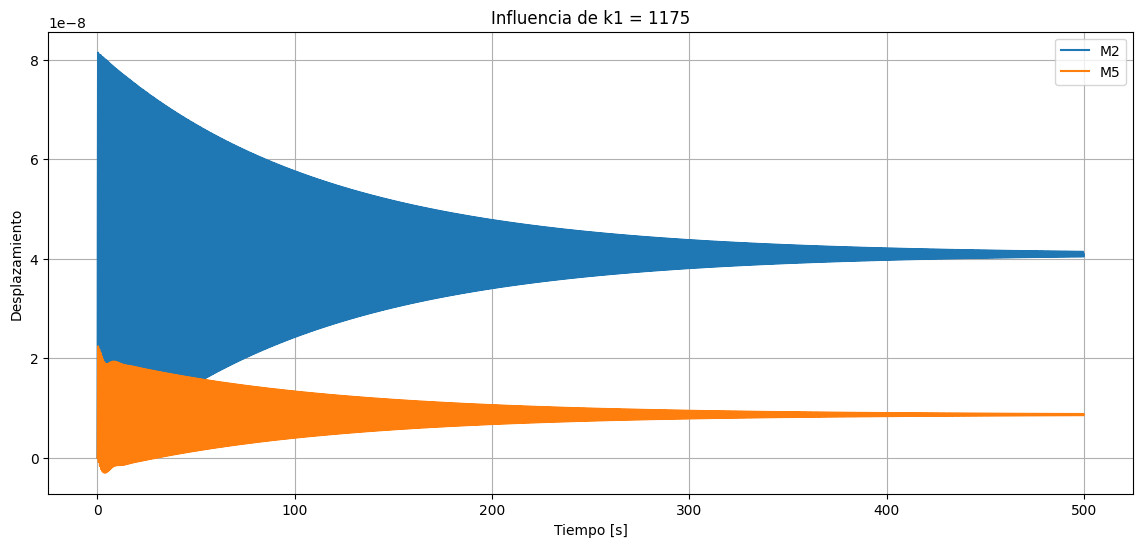

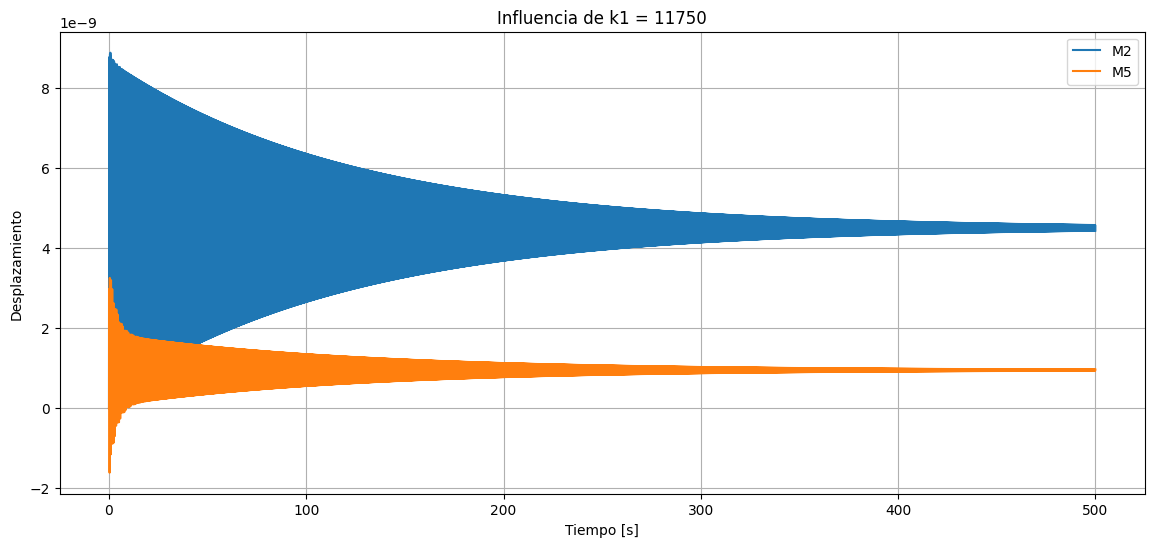

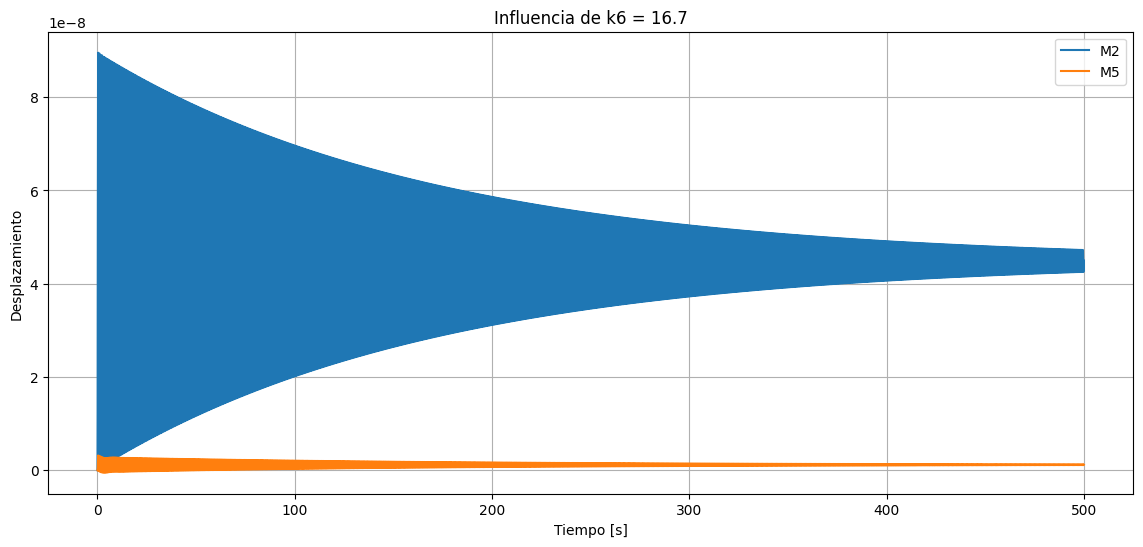

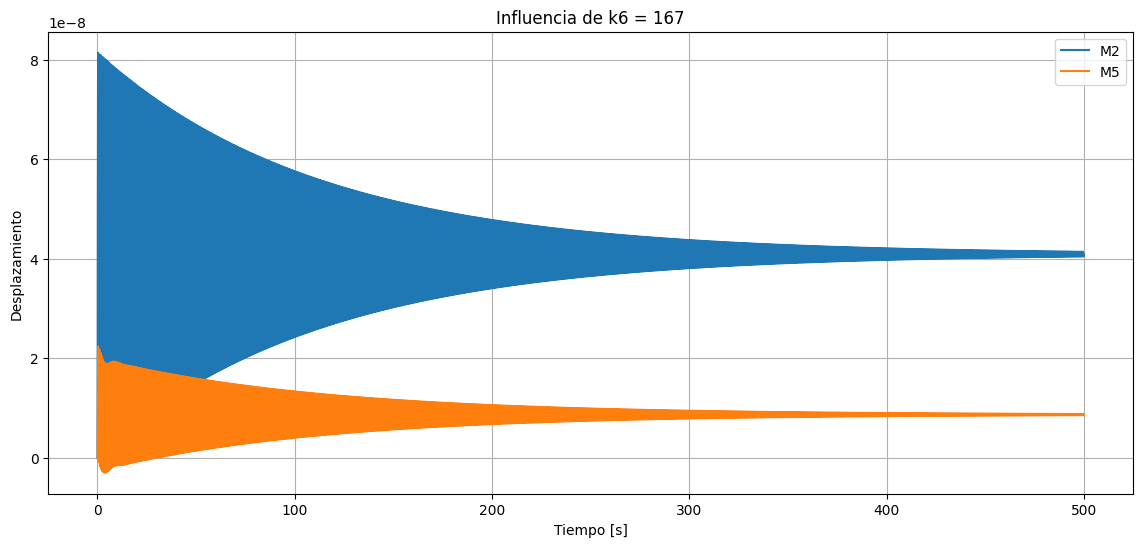

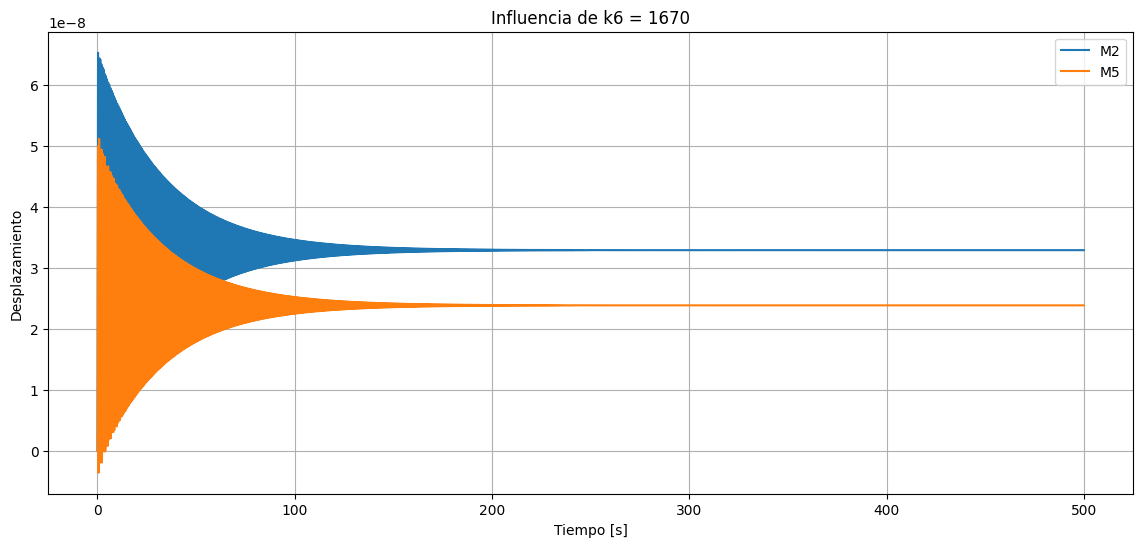

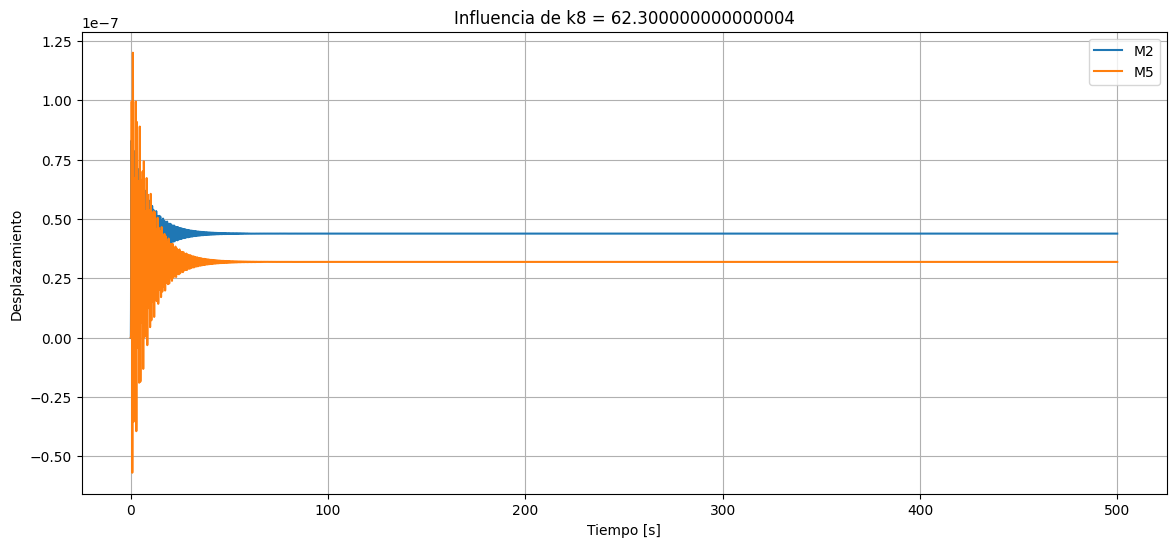

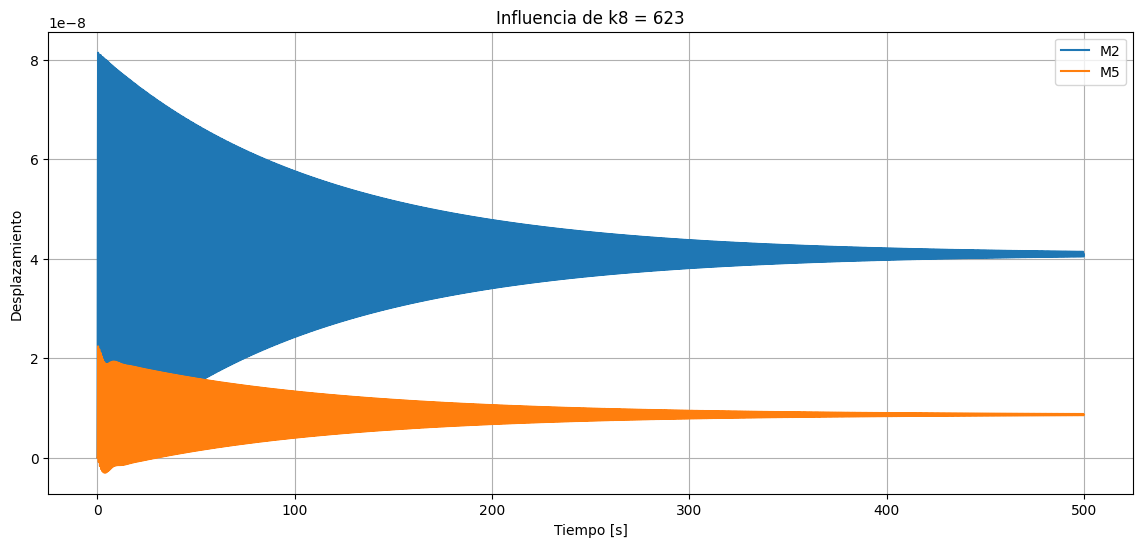

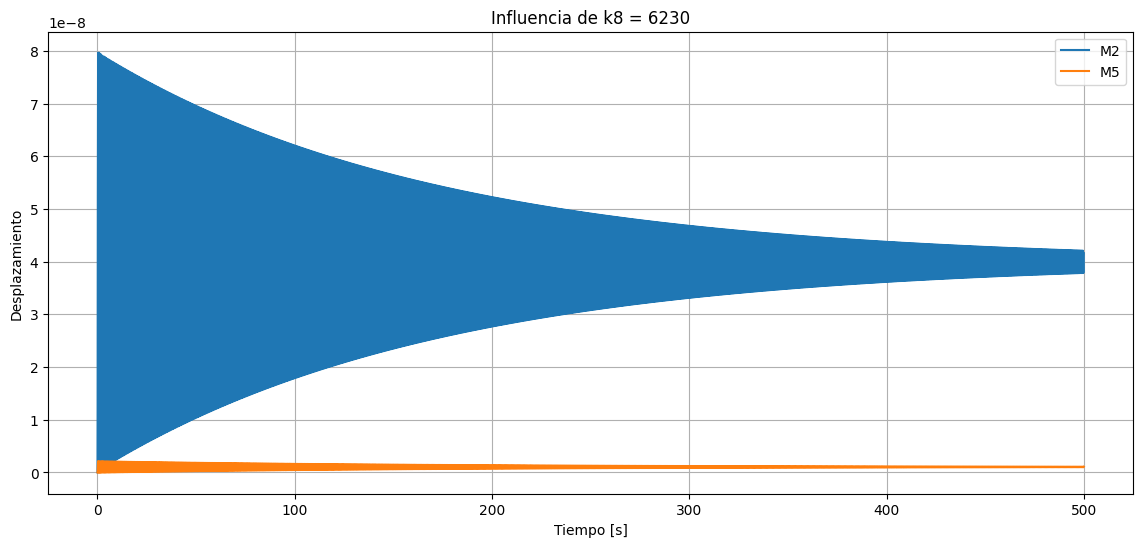

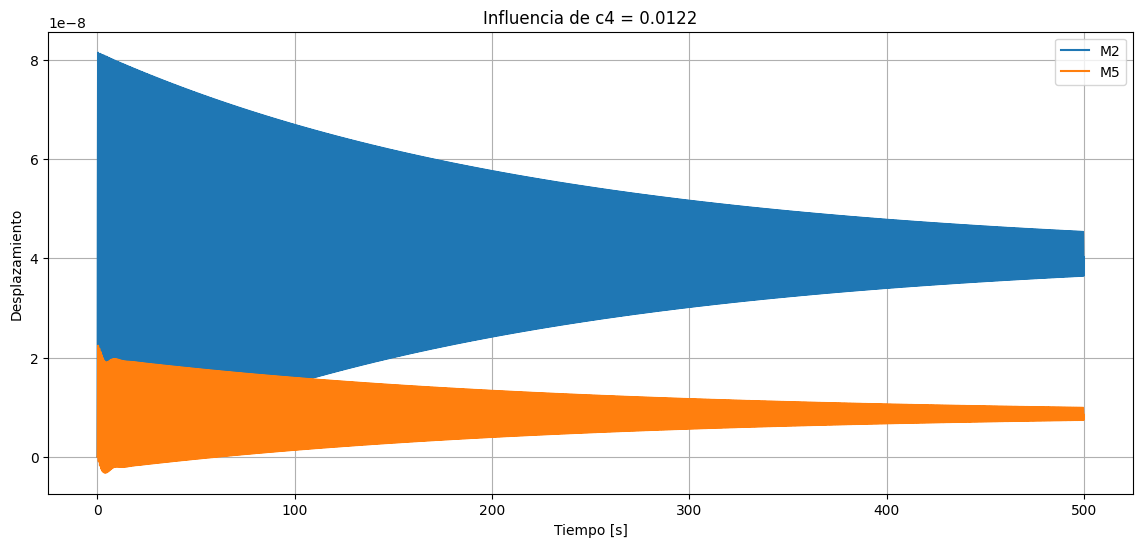

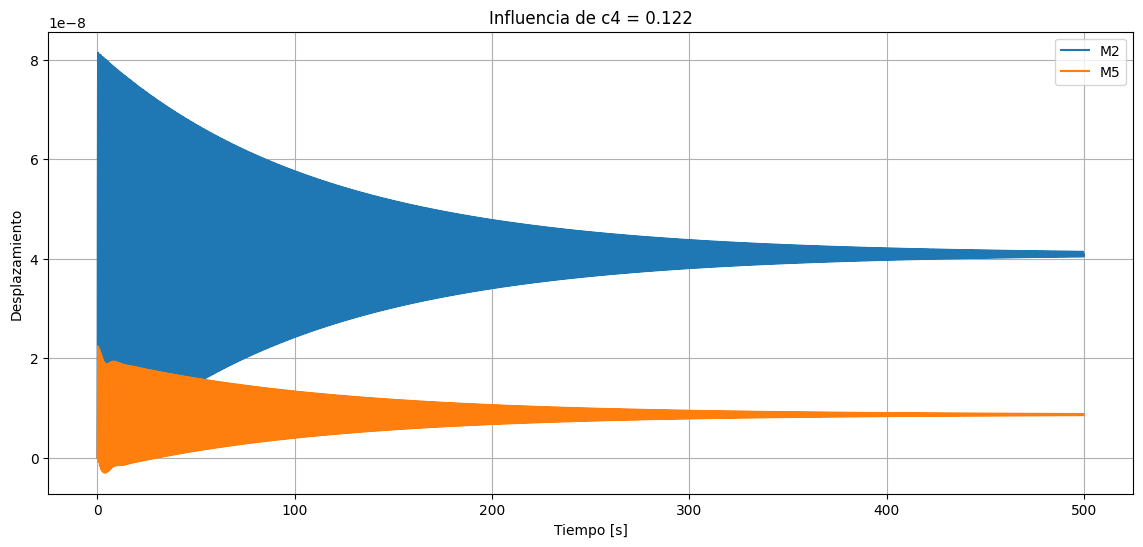

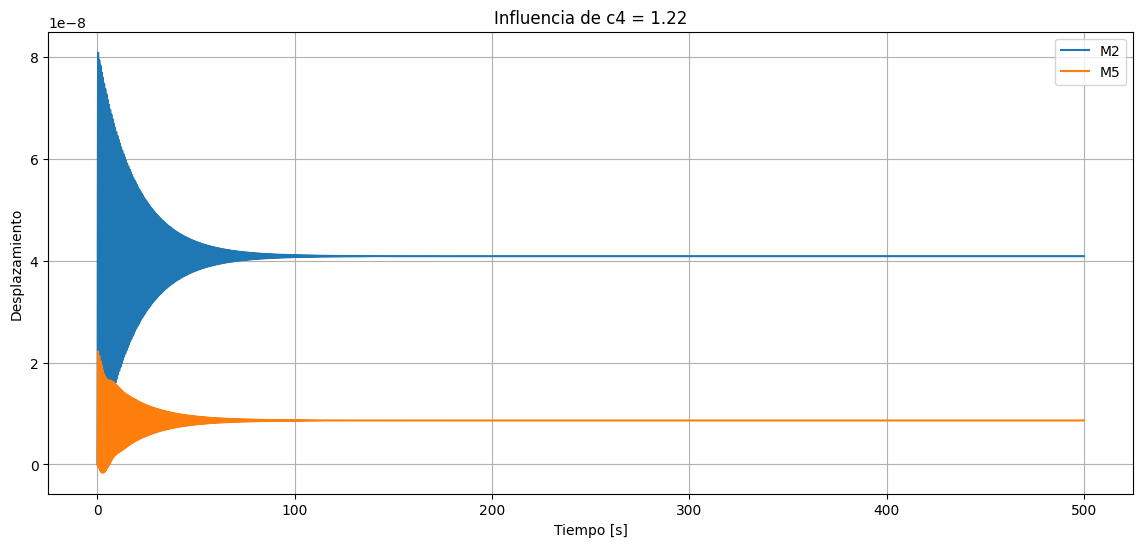

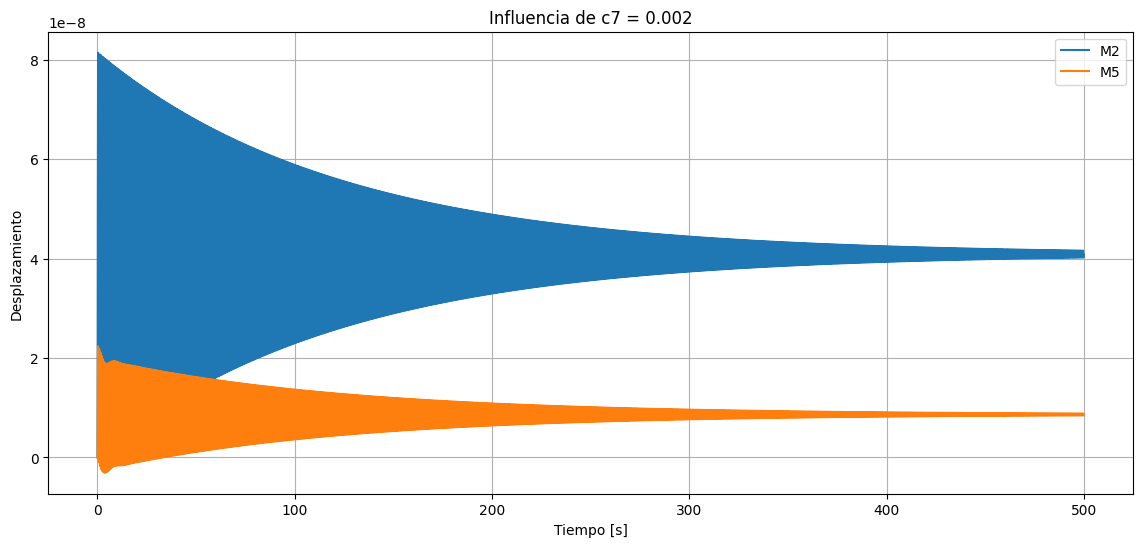

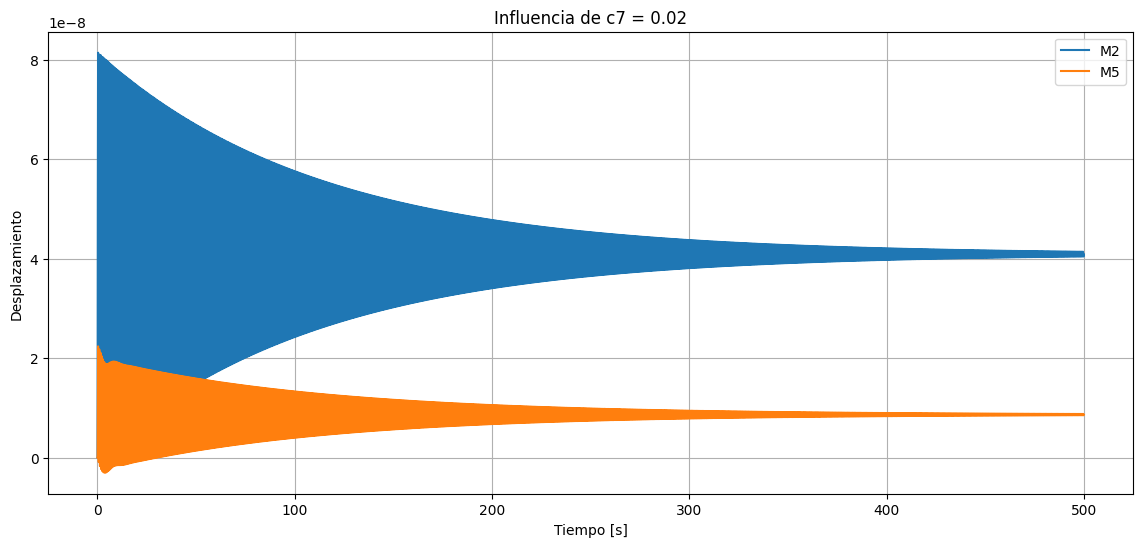

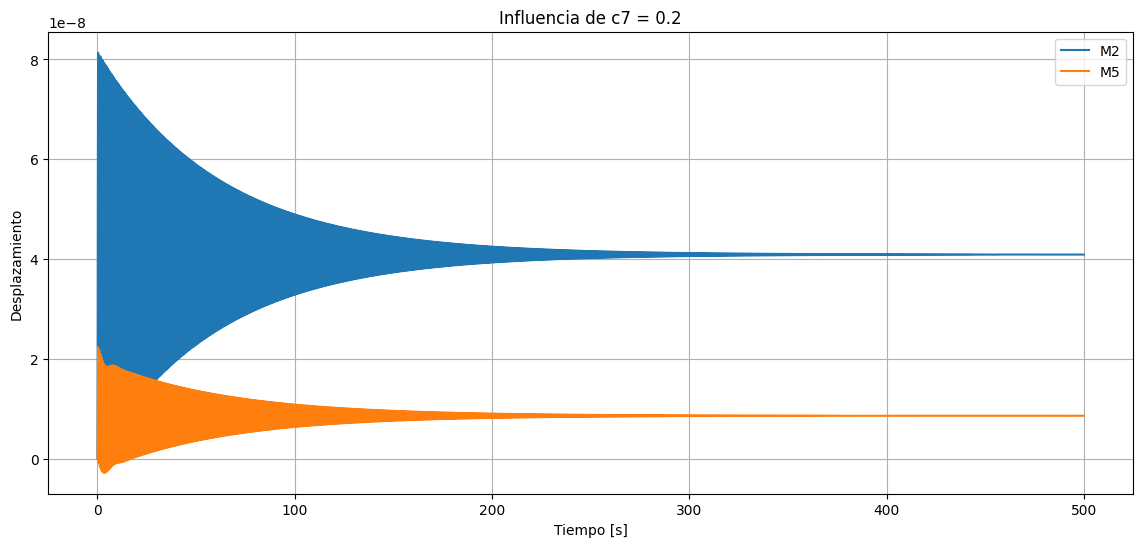

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de las constantes
M1, M2, M3, M4, M5, M6 = 1.55, 2.7, 4, 4, 1.78, 25.5
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = 0.00007, 0.5, 1.74, 0.122, 0.359, 0.00028, 0.02, 0.00004, 1, 1
k1, k2, k3, k5, k6, k8 = 1175, 20001, 94740, 1000017, 167, 623
F1 = 0
F2, F3, F4, F5, F6 = 0.00005346, 0, 0, 0, 0

# Crear un vector de tiempo
t0 = 0
tf = 500
deltaT = 0.001
t = np.arange(t0, tf, deltaT)

# Crear un vector para almacenar los valores de Y
y = np.zeros((12, len(t)))

# Asignar las condiciones iniciales
y[:, 0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Crear una función para evaluar las derivadas
def derivadas(y, t, k1, k6, k8, c4, c7):
    y1, y2, y3, y4, y5, y6, dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt = y
    dy1_dt2 = (F1 - c2 * dy1_dt + c2 * dy2_dt - k2 * y1 + k2 * y2) / M1
    dy2_dt2 = (F2 + c2 * dy1_dt - (c1 + c2 + c3) * dy2_dt + c3 * dy3_dt + k2 * y1 - (k1 + k2 + k3) * y2 + k3 * y3) / M2
    dy3_dt2 = (F3 + c3 * dy2_dt - (c3 + c4 + c5) * dy3_dt + c5 * dy4_dt + k3 * y2 - (k3 + k5) * y3 + k5 * y4) / M3
    dy4_dt2 = (F4 + c5 * dy3_dt - (c5 + c6 + c7) * dy4_dt + c6 * dy5_dt + k5 * y3 - (k5 + k6) * y4 + k6 * y5) / M4
    dy5_dt2 = (F5 + c6 * dy4_dt - (c6 + c8 + c9) * dy5_dt + c9 * dy6_dt + k6 * y4 - (k6 + k8) * y5) / M5
    dy6_dt2 = (F6 + c9 * dy5_dt - (c9 + c10) * dy6_dt) / M6
    return np.array([dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt, dy1_dt2, dy2_dt2, dy3_dt2, dy4_dt2, dy5_dt2, dy6_dt2])

# Método iterativo usando el método de Runge-Kutta de cuarto orden
def runge_kutta_4(y, t, deltaT, k1, k6, k8, c4, c7):
    k1_res = derivadas(y, t, k1, k6, k8, c4, c7)
    k2_res = derivadas(y + 0.5 * k1_res * deltaT, t + 0.5 * deltaT, k1, k6, k8, c4, c7)
    k3_res = derivadas(y + 0.5 * k2_res * deltaT, t + 0.5 * deltaT, k1, k6, k8, c4, c7)
    k4_res = derivadas(y + k3_res * deltaT, t + deltaT, k1, k6, k8, c4, c7)
    return y + (deltaT / 6.0) * (k1_res + 2*k2_res + 2*k3_res + k4_res)

# Evaluar el impacto de los parámetros en M2 y M5
parametros = ['k1', 'k6', 'k8', 'c4', 'c7']
valores_iniciales = [k1, k6, k8, c4, c7]

for j, param in enumerate(valores_iniciales):
    for cambio in [0.1, 1, 10]:  # Cambiar el valor del parámetro a 0.1, 1 y 10 veces
        k1, k6, k8, c4, c7 = valores_iniciales
        exec(f'{parametros[j]} = {param} * cambio')

        # Resetear condiciones iniciales
        y[:, 0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        # Integración numérica usando Runge-Kutta
        for i in range(len(t) - 1):
            y[:, i + 1] = runge_kutta_4(y[:, i], t[i], deltaT, k1, k6, k8, c4, c7)


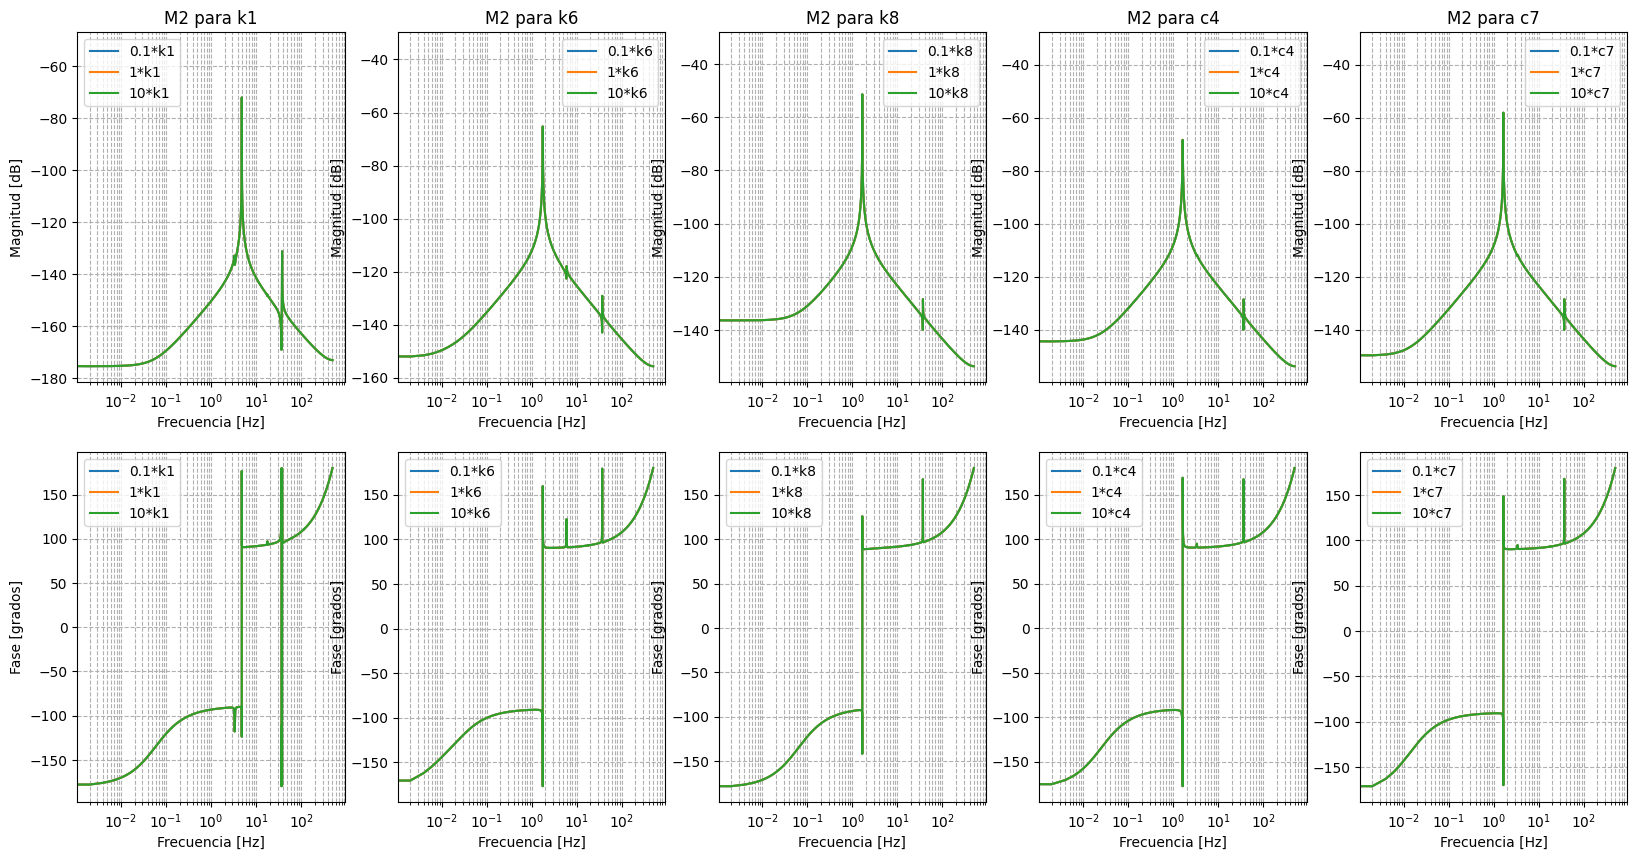

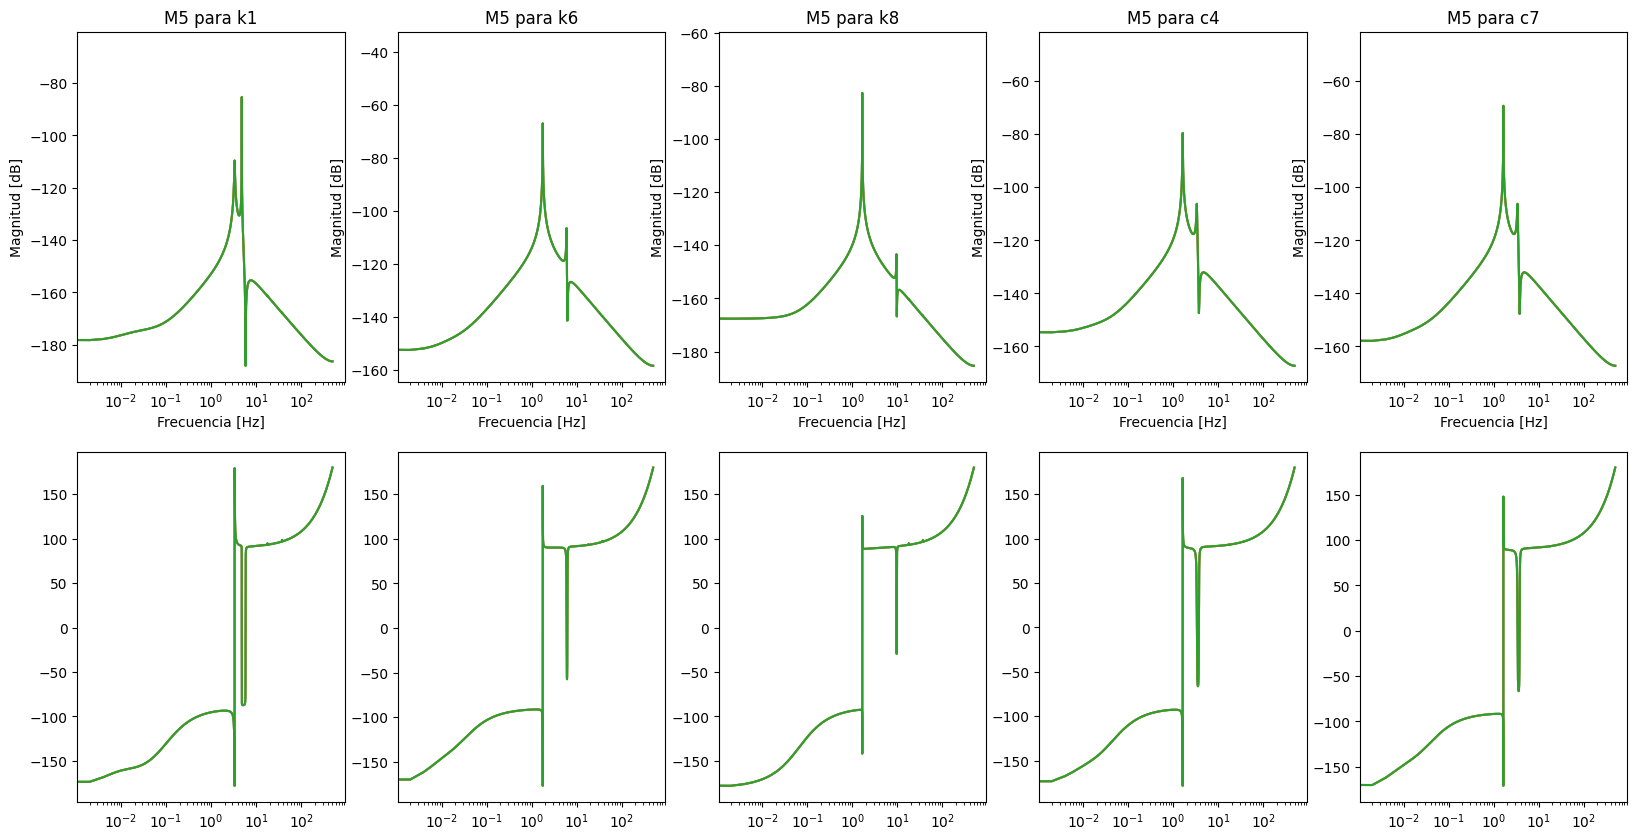

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de las constantes
M1, M2, M3, M4, M5, M6 = 1.55, 2.7, 4, 4, 1.78, 25.5
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = 0.00007, 0.5, 1.74, 0.122, 0.359, 0.00028, 0.02, 0.00004, 1, 1
k1, k2, k3, k5, k6, k8 = 1175, 20001, 94740, 1000017, 167, 623
F1 = 0
F2, F3, F4, F5, F6 = 0.00005346, 0, 0, 0, 0

# Crear un vector de tiempo
t0 = 0
tf = 500
deltaT = 0.001
t = np.arange(t0, tf, deltaT)

# Crear un vector para almacenar los valores de Y
y = np.zeros((12, len(t)))

# Asignar las condiciones iniciales
y[:, 0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Crear una función para evaluar las derivadas
def derivadas(y, t, k1, k6, k8, c4, c7):
    y1, y2, y3, y4, y5, y6, dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt = y
    dy1_dt2 = (F1 - c2 * dy1_dt + c2 * dy2_dt - k2 * y1 + k2 * y2) / M1
    dy2_dt2 = (F2 + c2 * dy1_dt - (c1 + c2 + c3) * dy2_dt + c3 * dy3_dt + k2 * y1 - (k1 + k2 + k3) * y2 + k3 * y3) / M2
    dy3_dt2 = (F3 + c3 * dy2_dt - (c3 + c4 + c5) * dy3_dt + c5 * dy4_dt + k3 * y2 - (k3 + k5) * y3 + k5 * y4) / M3
    dy4_dt2 = (F4 + c5 * dy3_dt - (c5 + c6 + c7) * dy4_dt + c6 * dy5_dt + k5 * y3 - (k5 + k6) * y4 + k6 * y5) / M4
    dy5_dt2 = (F5 + c6 * dy4_dt - (c6 + c8 + c9) * dy5_dt + c9 * dy6_dt + k6 * y4 - (k6 + k8) * y5) / M5
    dy6_dt2 = (F6 + c9 * dy5_dt - (c9 + c10) * dy6_dt) / M6
    return np.array([dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt, dy1_dt2, dy2_dt2, dy3_dt2, dy4_dt2, dy5_dt2, dy6_dt2])

# Método iterativo usando el método de Runge-Kutta de cuarto orden
def runge_kutta_4(y, t, deltaT, k1, k6, k8, c4, c7):
    k1_res = derivadas(y, t, k1, k6, k8, c4, c7)
    k2_res = derivadas(y + 0.5 * k1_res * deltaT, t + 0.5 * deltaT, k1, k6, k8, c4, c7)
    k3_res = derivadas(y + 0.5 * k2_res * deltaT, t + 0.5 * deltaT, k1, k6, k8, c4, c7)
    k4_res = derivadas(y + k3_res * deltaT, t + deltaT, k1, k6, k8, c4, c7)
    return y + (deltaT / 6.0) * (k1_res + 2*k2_res + 2*k3_res + k4_res)

# Función para convertir a dB
def to_dB(value):
    return 20 * np.log10(np.abs(value))

# Evaluar el impacto de los parámetros en M2 y M5
parametros = ['k1', 'k6', 'k8', 'c4', 'c7']
valores_iniciales = [k1, k6, k8, c4, c7]
valores = [0.1, 1, 10]

# Inicializar las figuras para los diagramas de Bode
fig_M2, axs_M2 = plt.subplots(2, len(parametros), figsize=(20, 10))
fig_M5, axs_M5 = plt.subplots(2, len(parametros), figsize=(20, 10))

for j, param in enumerate(parametros):
    respuestas_M2 = []
    respuestas_M5 = []

    for cambio in valores:
        # Copiar valores iniciales
        k1_val, k6_val, k8_val, c4_val, c7_val = valores_iniciales

        # Modificar el parámetro correspondiente
        if param == 'k1':
            k1_val *= cambio
        elif param == 'k6':
            k6_val *= cambio
        elif param == 'k8':
            k8_val *= cambio
        elif param == 'c4':
            c4_val *= cambio
        elif param == 'c7':
            c7_val *= cambio

        # Resetear condiciones iniciales
        y[:, 0] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

        # Integración numérica usando Runge-Kutta
        for i in range(len(t) - 1):
            y[:, i + 1] = runge_kutta_4(y[:, i], t[i], deltaT, k1_val, k6_val, k8_val, c4_val, c7_val)

        respuestas_M2.append(y[1, :])
        respuestas_M5.append(y[4, :])

    # Realizar la FFT para M2 y M5
    fft_M2 = [np.fft.fft(resp) for resp in respuestas_M2]
    fft_M5 = [np.fft.fft(resp) for resp in respuestas_M5]
    n = len(t)
    freq = np.fft.fftfreq(n, deltaT)

    # Graficar el diagrama de Bode para M2
    for k, cambio in enumerate(valores):
        axs_M2[0, j].semilogx(freq[:n//2], to_dB(fft_M2[k][:n//2]), label=f'{cambio}*{param}')
        axs_M2[1, j].semilogx(freq[:n//2], np.angle(fft_M2[k][:n//2], deg=True), label=f'{cambio}*{param}')

    axs_M2[0, j].set_title(f'M2 para {param}')
    axs_M2[0, j].set_xlabel('Frecuencia [Hz]')
    axs_M2[0, j].set_ylabel('Magnitud [dB]')
    axs_M2[0, j].legend()
    axs_M2[0, j].grid(True, which="both", ls="--")

    axs_M2[1, j].set_xlabel('Frecuencia [Hz]')
    axs_M2[1, j].set_ylabel('Fase [grados]')
    axs_M2[1, j].legend()
    axs_M2[1, j].grid(True, which="both", ls="--")

    # Graficar el diagrama de Bode para M5
    for k, cambio in enumerate(valores):
        axs_M5[0, j].semilogx(freq[:n//2], to_dB(fft_M5[k][:n//2]), label=f'{cambio}*{param}')
        axs_M5[1, j].semilogx(freq[:n//2], np.angle(fft_M5[k][:n//2], deg=True), label=f'{cambio}*{param}')

    axs_M5[0, j].set_title(f'M5 para {param}')
    axs_M5[0, j].set_xlabel('Frecuencia [Hz]')
    axs_M5[0, j].set_ylabel('Magnitud [dB]')
